In [1]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime as dt #for organizing data by date info
from IPython.core.display import display
from numpy.fft import fft, ifft  #for fft analysis

In [2]:
# Extract Data
energydata = pd.read_csv (r'C:\Users\rajpa\Final_Project\generation.csv')

# Removing the top three rows as they are just additional descriptive headings
energydata = energydata.drop([0,1,2], axis = 0)

In [3]:
energydata.head()

,EntityId,IsOfficial,isProjection,ShortName,Title,PublicationYear,Year,Technology,TechnologySubtype,PublicationUrl,...,FuelNote,GeneralOMNote,HeatRateNote,GeneralCostsNote,GeneralHeatRateEffNote,TechnologyNote,GeneralNote,AvgCapacityFactorNote,OnghtCptlCostDolPerKwNote,Scenario
3,21178,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2027,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21179,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2028,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,21180,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2029,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21181,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2030,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21182,0,1.0,EPA 2010,Environmental Protection Agency (2010). Data f...,2010,2031,Biopower,Biogas,http://www.epa.gov/airmarkt/progsregs/epa-ipm/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Size of the data set
print('The size of Energy data set is: ', energydata.shape)

The size of Energy data set is:  (10302, 63)


In [5]:
# Find the columns and their datatypes
energydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10302 entries, 3 to 10304
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EntityId                    10302 non-null  object 
 1   IsOfficial                  10302 non-null  object 
 2   isProjection                10302 non-null  float64
 3   ShortName                   10302 non-null  object 
 4   Title                       10302 non-null  object 
 5   PublicationYear             10302 non-null  object 
 6   Year                        10302 non-null  object 
 7   Technology                  10102 non-null  object 
 8   TechnologySubtype           5005 non-null   object 
 9   PublicationUrl              8641 non-null   object 
 10  Author                      10302 non-null  object 
 11  VariableOMDolPerMwh         6267 non-null   object 
 12  FixedOMDolPerKw             7100 non-null   object 
 13  lcoe                        103

There are 10302 rows for different Energy Generation technologies providing a variety of raw cost and performance numbers (current and future projections) that can be further used to calculated other metrics and analyze using graphs to visualize the differences.

In [6]:
# Finding unique energy generation technologies
energydata['Technology'].unique().tolist()

['Biopower',
 'Geothermal',
 'Photovoltaic',
 'Solar Thermal',
 'Combined Cycle',
 'Combustion Turbine',
 'Hydroelectric',
 'Distributed Generation',
 'Fuel Cell',
 'Coal',
 'Nuclear',
 'Land-Based Wind',
 'Wind-Offshore',
 nan,
 'Storage',
 'Ocean',
 'Small Hydro',
 'Land-based Wind']

In [7]:
# Number of unique energy generation technologies
len(energydata['Technology'].unique().tolist())

18

As it can be seen in the above output that there are about 18 unique energy generation technologies that will be analyzed but one of them is NaN so it will be filtered out when performing analysis and other one is "storage" as it is a storage technology.

In [8]:
# Visualize the subtypes of technologies
energydata['TechnologySubtype'].unique().tolist()

['Biogas',
 nan,
 'Advanced CC CCS',
 'Advanced Combustion Turbine',
 'Advanced CC',
 'Conventional Combustion Turbine',
 'Conventional CC',
 'Conventional',
 'Flash',
 'IGCC',
 'IGCC CCS',
 'Advanced PC',
 'Enhanced Geothermal System',
 'Binary',
 'Battery',
 'Compressed Air',
 'Coal Co-fire',
 'Ice Storage',
 'Pumped Hydro',
 'Advanced PC CCS',
 'Conventional PC',
 'Marine Hydro-Kinetic',
 'Residential',
 'Utility',
 'Tower',
 'Trough',
 'Blind',
 'Fixed Platform',
 'Commercial',
 'Fluidized Bed',
 'Advanced Nuclear',
 'MSW',
 'Diesel',
 'Microturbine',
 'Stoker boiler',
 'Stoker CHP',
 'Gasifier CHP',
 'Digester',
 'Base',
 'Peak',
 'Hydrogen',
 'SMES',
 'Flywheel',
 'Ultracapacitors',
 'residential',
 'conventional CC',
 'Tidal Current',
 'Wave Point',
 'Ocean Current',
 'Small, 10 ft net head',
 'Small, 20 ft net head',
 'Floating Platform']

In [66]:
# New dataframe with all fixes
newdata = energydata.iloc[:,[6,5,7,8,11,12,13,15,16,17,18,19,20,21,29,30,38,39,40,41,43]]
newdata = newdata.dropna(subset = ['Technology'])
newdata.loc[:,'OnghtCptlCostDolPerKw'] = newdata.loc[:,'OnghtCptlCostDolPerKw'].astype(float)
newdata.loc[:,'VariableOMDolPerMwh'] = newdata.loc[:,'VariableOMDolPerMwh'].astype(float)
newdata.loc[:,'FixedOMDolPerKw'] = newdata.loc[:,'FixedOMDolPerKw'].astype(float)
newdata.loc[:,'FixedOMDolPerKw'] = newdata.loc[:,'FixedOMDolPerKw'].astype(float)
newdata.loc[:,'AvgCapacityFactor'] = newdata.loc[:,'AvgCapacityFactor'].astype(float)
newdata.loc[:,'ThermalEfficiency'] = newdata.loc[:,'ThermalEfficiency'].astype(float)
newdata.loc[:,'Leadtimeyears'] = newdata.loc[:,'Leadtimeyears'].astype(float)
newdata.loc[:,'LifetimeYears'] = newdata.loc[:,'LifetimeYears'].astype(float)
newdata.loc[:,'lcoe'] = newdata.loc[:,'lcoe'].astype(float)
newdata.loc[:,'Co2MetricTonsPerMwh'] = newdata.loc[:,'Co2MetricTonsPerMwh'].astype(float)
newdata['Technology']=newdata['Technology'].str.capitalize()
newdata.drop(newdata.loc[newdata['Technology']== 'Storage'].index, inplace = True)
newdata.head()

,Year,PublicationYear,Technology,TechnologySubtype,VariableOMDolPerMwh,FixedOMDolPerKw,lcoe,AvgCapacityFactor,MinCapacityFactor,MaxCapacityFactor,...,HeatRate,LifetimeYears,AvailabilityFactor,CapacityMw,InstalledCapacityMW,Leadtimeyears,ThermalEfficiency,StorageEfficiency,Co2MetricTonsPerMwh,DolYear
3,2027,2010,Biopower,Biogas,0.01,114.3,0.08549,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007
4,2028,2010,Biopower,Biogas,0.01,114.3,0.08549,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007
5,2029,2010,Biopower,Biogas,0.01,114.3,0.08549,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007
6,2030,2010,Biopower,Biogas,0.01,114.3,0.07797,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007
7,2031,2010,Biopower,Biogas,0.01,114.3,0.07797,NaN,NaN,NaN,...,13648,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,2007


In [10]:
# Size of the new dataframe
print('The size of new data set is: ', newdata.shape)

The size of new data set is:  (9863, 21)


As it can be seen in the above piece of code the NaN rows in the "Technology" column are dropped.

In [11]:
# Unique Technologies after dropping NaN
newdata['Technology'].unique().tolist()

['Biopower',
 'Geothermal',
 'Photovoltaic',
 'Solar thermal',
 'Combined cycle',
 'Combustion turbine',
 'Hydroelectric',
 'Distributed generation',
 'Fuel cell',
 'Coal',
 'Nuclear',
 'Land-based wind',
 'Wind-offshore',
 'Ocean',
 'Small hydro']

In [12]:
# Number of Unique Technologies after dropping NaN
len(newdata['Technology'].unique().tolist())

15

In [13]:
# Technologies with Overnight Capital Cost values
OCC = newdata.dropna(subset = ['OnghtCptlCostDolPerKw'])
OCC['Technology'].unique().tolist()

['Combined cycle',
 'Combustion turbine',
 'Biopower',
 'Hydroelectric',
 'Distributed generation',
 'Fuel cell',
 'Geothermal',
 'Coal',
 'Nuclear',
 'Photovoltaic',
 'Solar thermal',
 'Land-based wind',
 'Wind-offshore',
 'Ocean',
 'Small hydro']

In [14]:
# Number of technologies with Overnight Capital Cost values
len(OCC['Technology'].unique().tolist())

15

Data manipulation for the Over Night Capital Cost per kW. Importance of OCC is....

In [15]:
# Find means of OCC
occmean=OCC.groupby('Technology',as_index=False)['OnghtCptlCostDolPerKw'].mean()
occmean

,Technology,OnghtCptlCostDolPerKw
0,Biopower,4772.043647
1,Coal,3049.073978
2,Combined cycle,1260.177002
3,Combustion turbine,715.514056
4,Distributed generation,1540.660619
5,Fuel cell,5649.020406
6,Geothermal,4828.952914
7,Hydroelectric,2567.806679
8,Land-based wind,1704.338659
9,Nuclear,4026.856362


In [16]:
# Find max of OCC
OCC.groupby('Technology',as_index=False)['OnghtCptlCostDolPerKw'].max()

,Technology,OnghtCptlCostDolPerKw
0,Biopower,16312.000000
1,Coal,11000.000000
2,Combined cycle,3800.000000
3,Combustion turbine,2255.000000
4,Distributed generation,9800.000000
5,Fuel cell,10000.000000
6,Geothermal,15752.000000
7,Hydroelectric,11070.000000
8,Land-based wind,5048.499635
9,Nuclear,8375.000000


In [17]:
# Find min of OCC
OCC.groupby('Technology',as_index=False)['OnghtCptlCostDolPerKw'].min()

,Technology,OnghtCptlCostDolPerKw
0,Biopower,140.000000
1,Coal,380.000000
2,Combined cycle,500.000000
3,Combustion turbine,238.390000
4,Distributed generation,500.000000
5,Fuel cell,1500.000000
6,Geothermal,1000.000000
7,Hydroelectric,500.000000
8,Land-based wind,842.831572
9,Nuclear,1600.000000


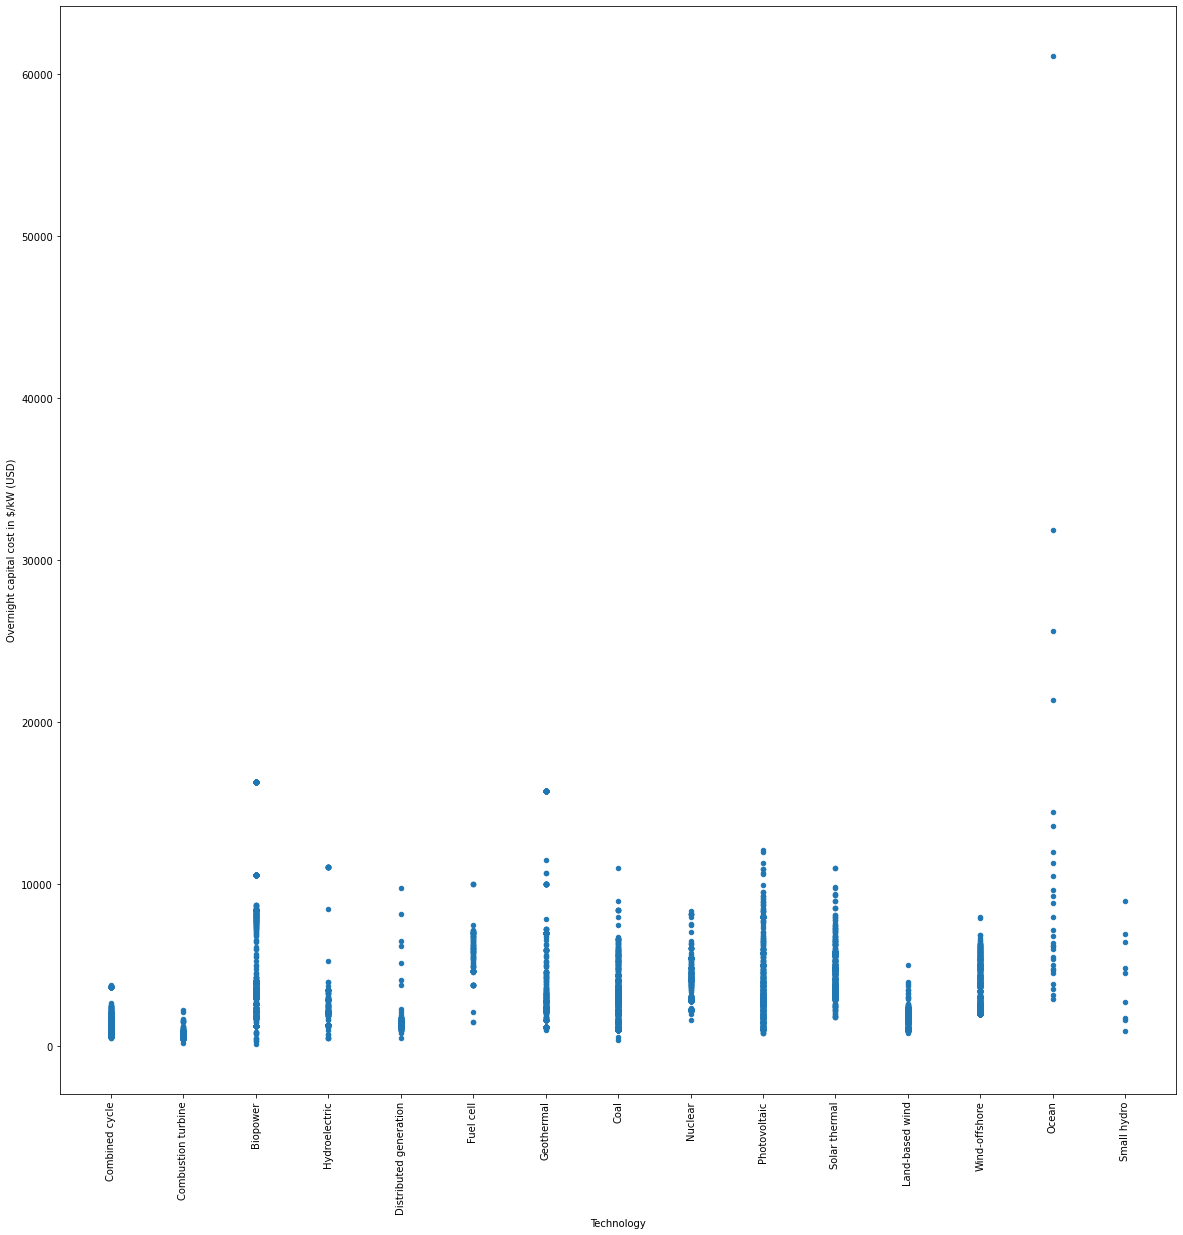

In [18]:
# Scatter Plot
#colors = {'Biopower':'green', 'Hydroelectric':'green','Geothermal':'green','Photovoltaic':'green','Solar thermal':'green', 'Land-based wind':'green','Small hydro':'green','Ocean':'green', 'Wind-offshore':'green'}
occsct = OCC.plot.scatter(x='Technology',y='OnghtCptlCostDolPerKw', figsize=(20,20))
occsct.set_xlabel("Technology")
occsct.set_ylabel("Overnight capital cost in $/kW" + " (" + "USD" + ")")
plt.xticks(rotation=90);

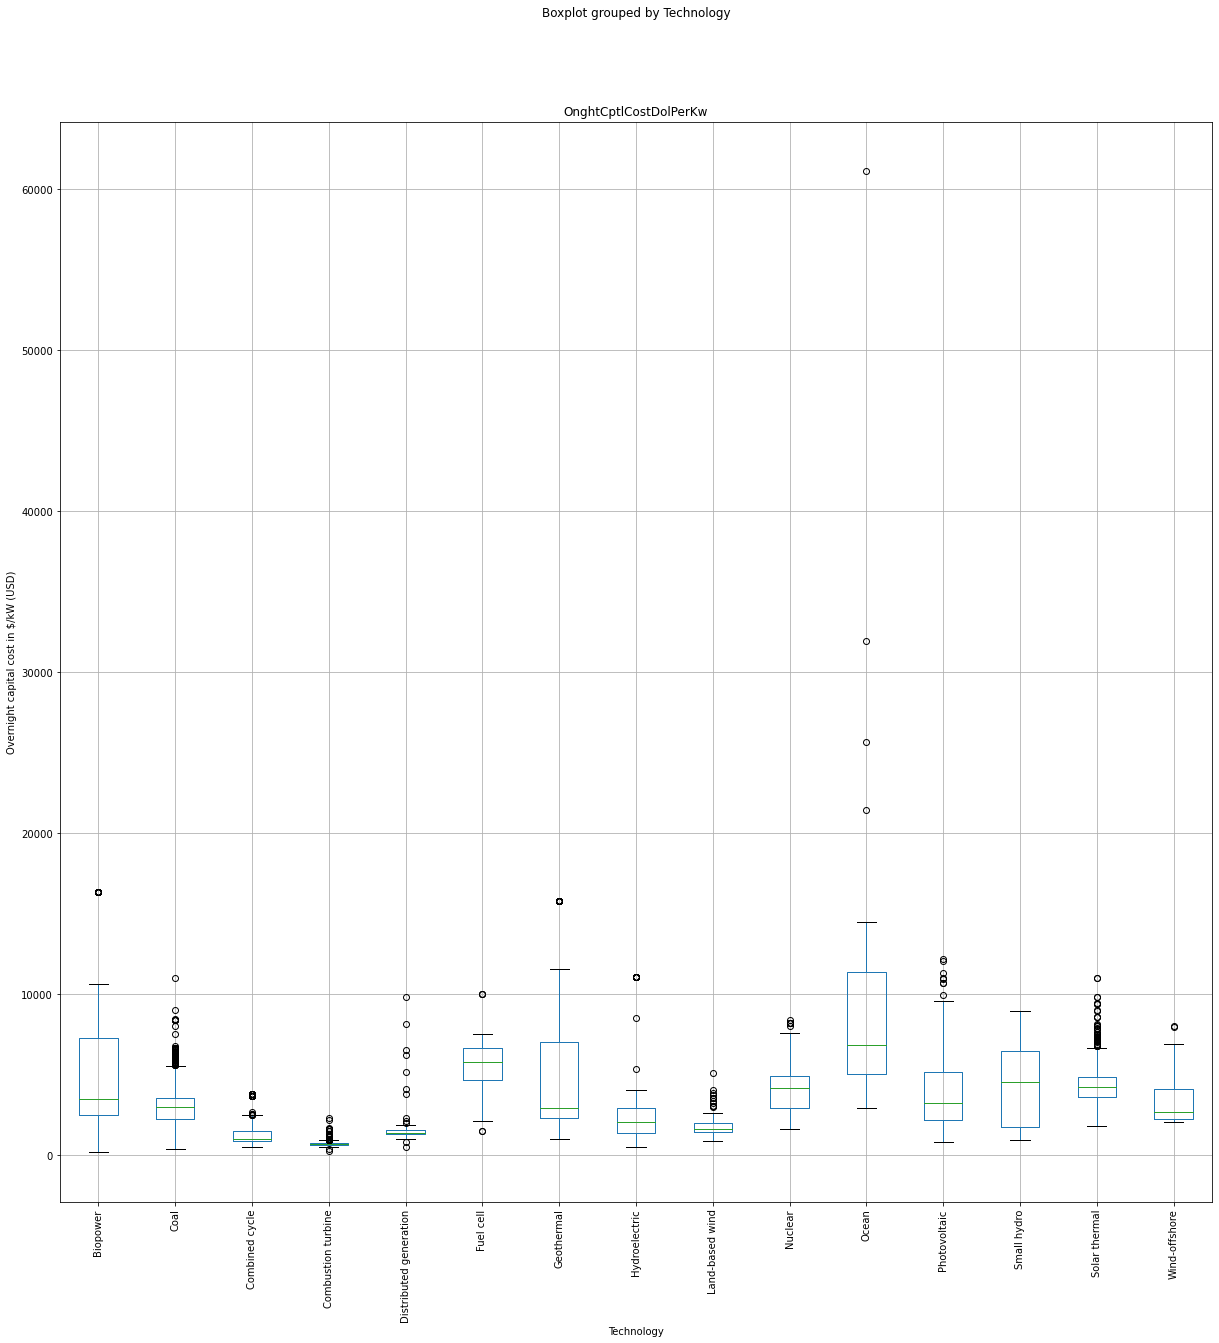

In [19]:
# Box and Whiskeer plot to see the outliers
occsct1 = OCC.boxplot(by = 'Technology' , column = ['OnghtCptlCostDolPerKw'], figsize=(20,20))
occsct1.set_xlabel("Technology")
occsct1.set_ylabel("Overnight capital cost in $/kW" + " (" + "USD" + ")")
plt.xticks(rotation=90);

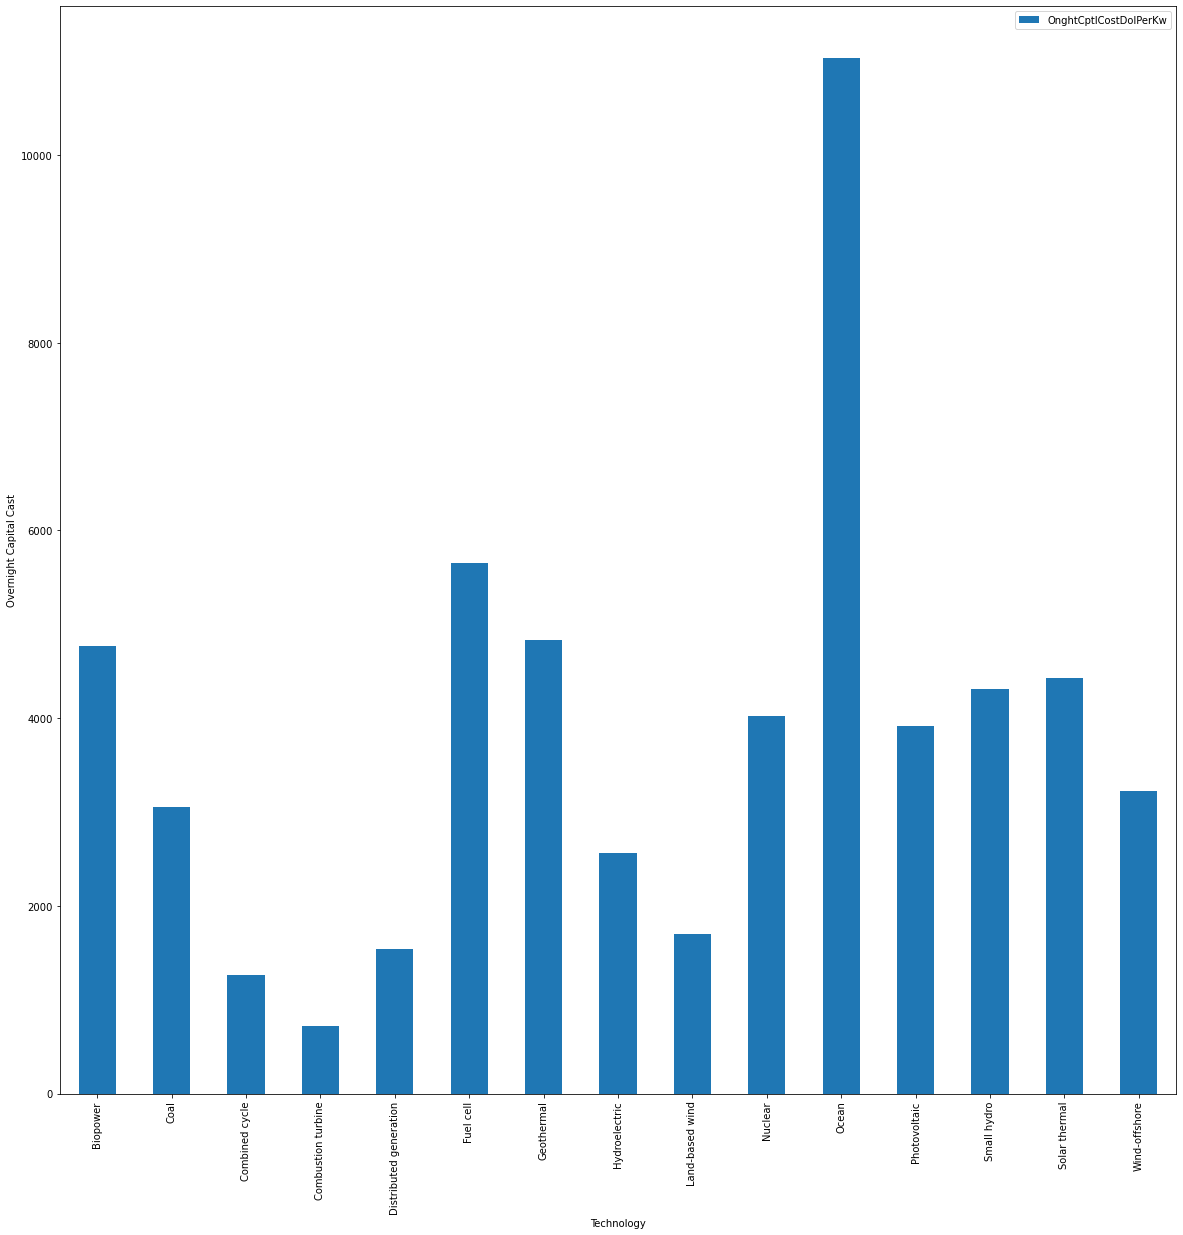

In [20]:
occbar = occmean.plot(kind = 'bar', x='Technology',y='OnghtCptlCostDolPerKw', figsize=(20,20))
occbar.set_xlabel("Technology")
occbar.set_ylabel("Overnight Capital Cast")
plt.xticks(rotation=90);

USE QUANTILES TO REMOVE OUTLIERS

In [21]:
# Technologies with Variable Operating values
VOC = newdata.dropna(subset = ['VariableOMDolPerMwh'])
VOC['Technology'].unique().tolist()

['Biopower',
 'Geothermal',
 'Photovoltaic',
 'Solar thermal',
 'Combined cycle',
 'Combustion turbine',
 'Hydroelectric',
 'Distributed generation',
 'Fuel cell',
 'Coal',
 'Nuclear',
 'Land-based wind',
 'Wind-offshore',
 'Small hydro',
 'Ocean']

In [22]:
# Number of technologies with Variable Operating Cost values
len(VOC['Technology'].unique().tolist())

15

In [23]:
# Find means of VOC
vocmean = VOC.groupby('Technology',as_index=False)['VariableOMDolPerMwh'].mean()
vocmean

,Technology,VariableOMDolPerMwh
0,Biopower,5.530643
1,Coal,4.384148
2,Combined cycle,3.273313
3,Combustion turbine,5.814345
4,Distributed generation,6.213333
5,Fuel cell,32.442025
6,Geothermal,1.851137
7,Hydroelectric,2.596107
8,Land-based wind,3.283080
9,Nuclear,1.342682


In [24]:
# Find max of VOC
VOC.groupby('Technology',as_index=False)['VariableOMDolPerMwh'].max()

,Technology,VariableOMDolPerMwh
0,Biopower,34.00
1,Coal,23.00
2,Combined cycle,15.00
3,Combustion turbine,29.90
4,Distributed generation,51.00
5,Fuel cell,50.00
6,Geothermal,40.00
7,Hydroelectric,15.00
8,Land-based wind,26.00
9,Nuclear,30.00


In [25]:
# Find min of VOC
VOC.groupby('Technology',as_index=False)['VariableOMDolPerMwh'].min()

,Technology,VariableOMDolPerMwh
0,Biopower,0.0
1,Coal,0.0
2,Combined cycle,0.0
3,Combustion turbine,0.0
4,Distributed generation,0.0
5,Fuel cell,0.0
6,Geothermal,0.0
7,Hydroelectric,0.0
8,Land-based wind,0.0
9,Nuclear,0.0


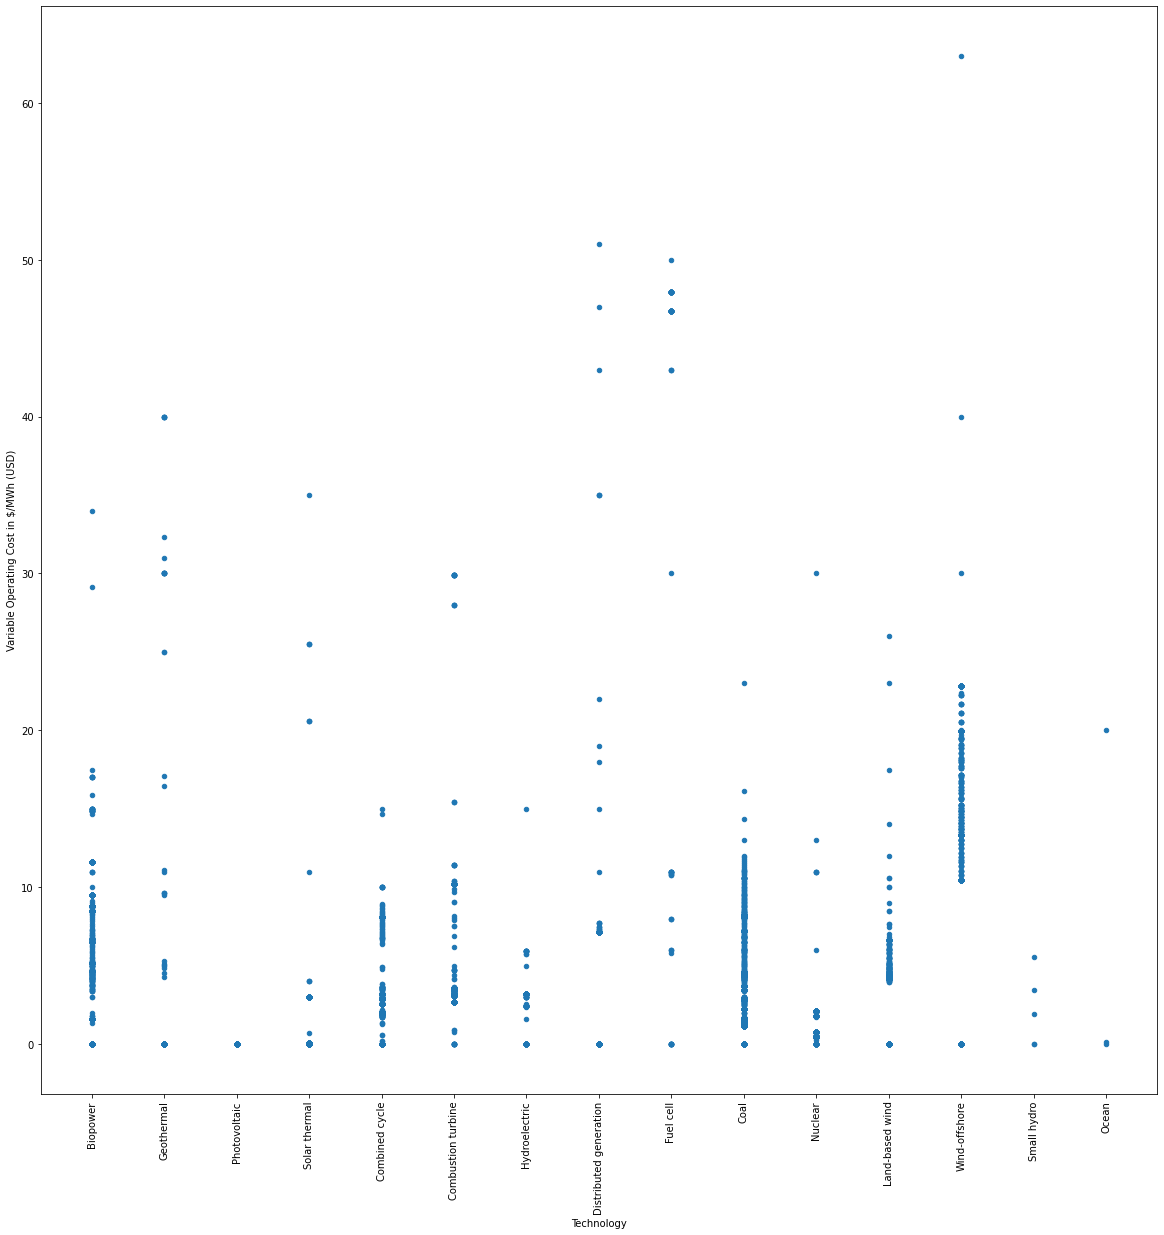

In [26]:
# Scatter Plot
#colors = {'Biopower':'green', 'Hydroelectric':'green','Geothermal':'green','Photovoltaic':'green','Solar thermal':'green', 'Land-based wind':'green','Small hydro':'green','Ocean':'green', 'Wind-offshore':'green'}
vocsct = VOC.plot.scatter(x='Technology',y='VariableOMDolPerMwh', figsize=(20,20))
vocsct.set_xlabel("Technology")
vocsct.set_ylabel("Variable Operating Cost in $/MWh" + " (" + "USD" + ")")
plt.xticks(rotation=90);

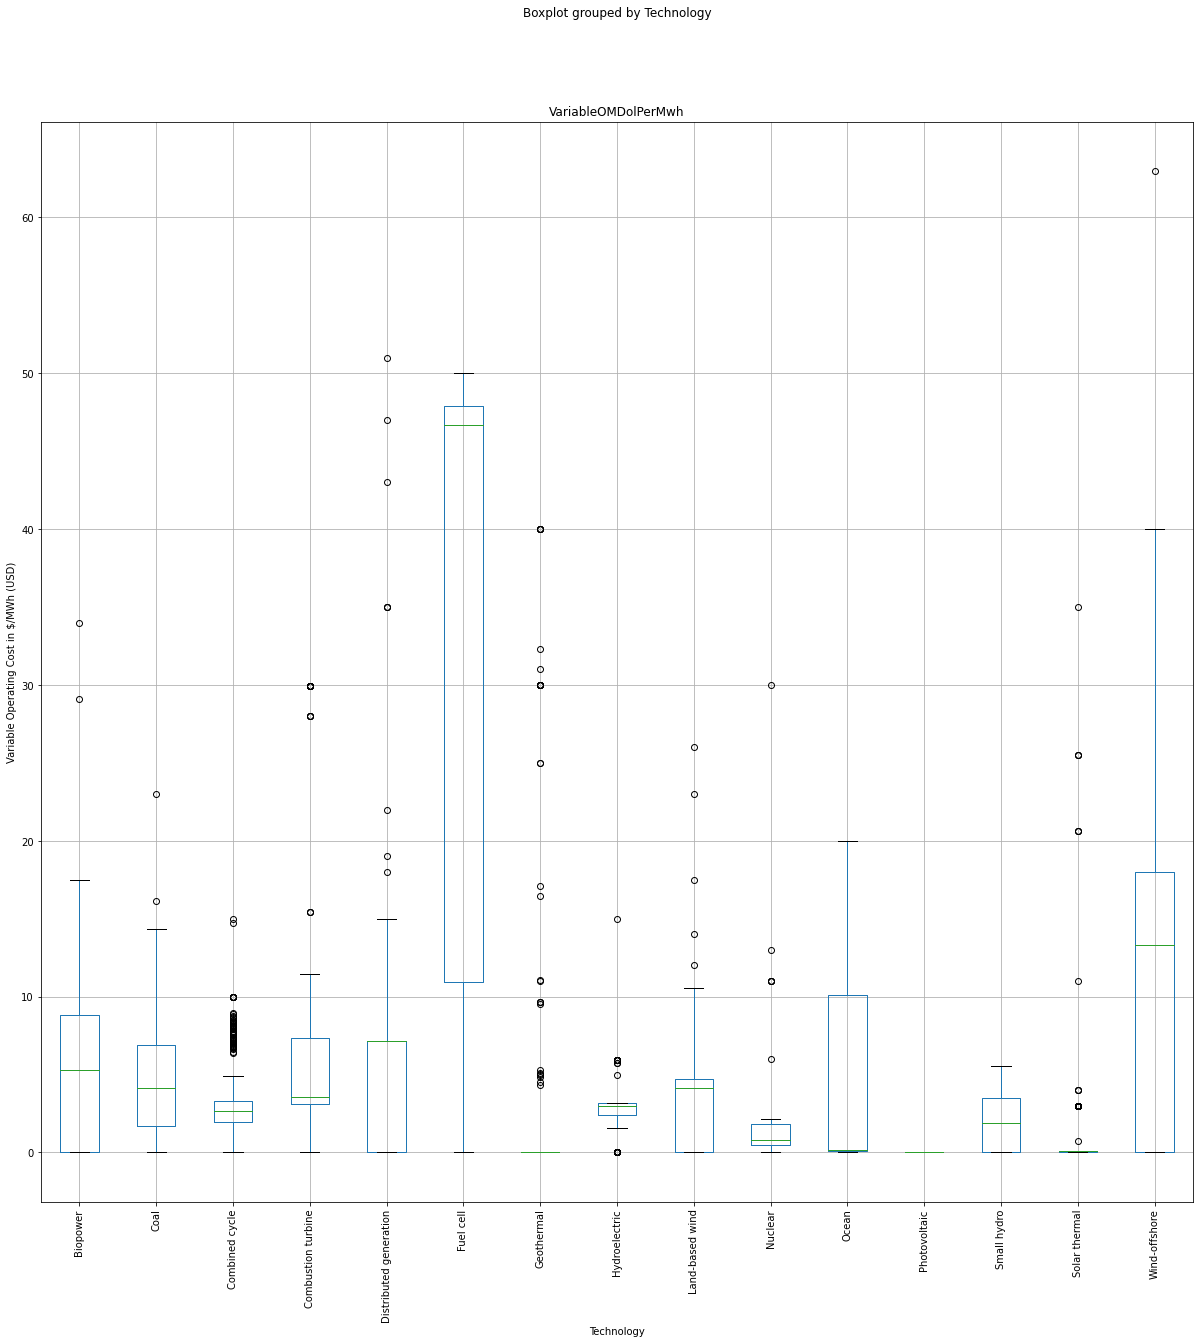

In [27]:
# Box and Whiskeer plot to see the outliers
vocsct1 = VOC.boxplot(by = 'Technology' , column = ['VariableOMDolPerMwh'], figsize=(20,20))
vocsct1.set_xlabel("Technology")
vocsct1.set_ylabel("Variable Operating Cost in $/MWh" + " (" + "USD" + ")")
plt.xticks(rotation=90);

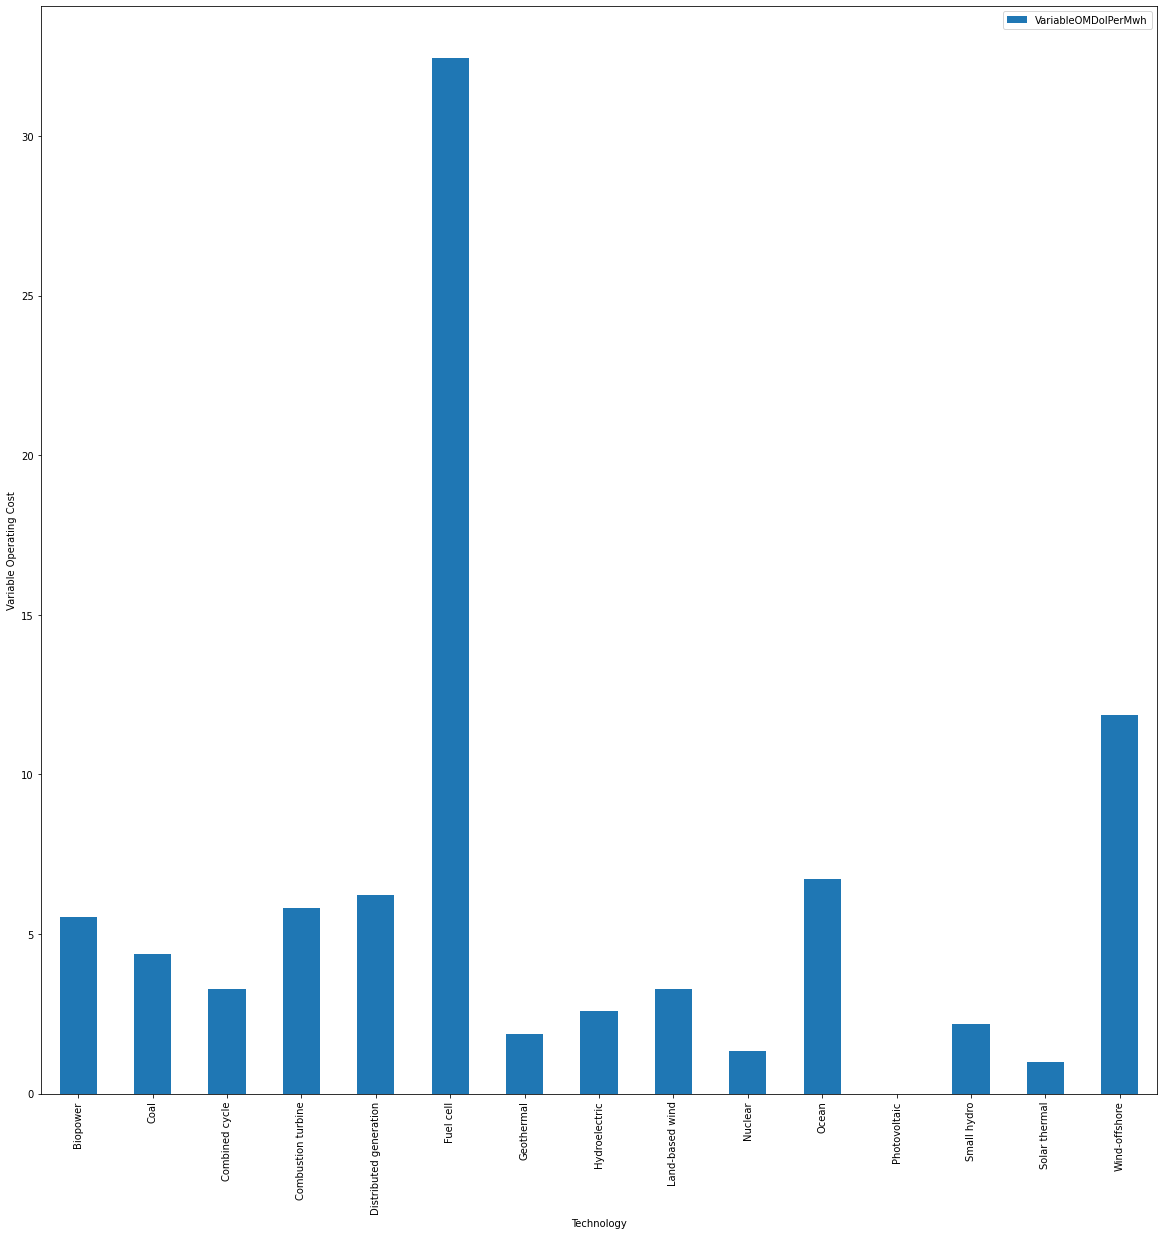

In [28]:
vocbar = vocmean.plot(kind = 'bar', x='Technology',y='VariableOMDolPerMwh', figsize=(20,20))
vocbar.set_xlabel("Technology")
vocbar.set_ylabel("Variable Operating Cost")
plt.xticks(rotation=90);

In [29]:
# Technologies with Fixed Operating values
FOC = newdata.dropna(subset = ['FixedOMDolPerKw'])
FOC['Technology'].unique().tolist()

['Biopower',
 'Geothermal',
 'Photovoltaic',
 'Solar thermal',
 'Combined cycle',
 'Combustion turbine',
 'Hydroelectric',
 'Distributed generation',
 'Fuel cell',
 'Coal',
 'Nuclear',
 'Land-based wind',
 'Wind-offshore',
 'Small hydro',
 'Ocean']

In [30]:
# Number of technologies with Fixed Operating Cost values
len(FOC['Technology'].unique().tolist())

15

In [31]:
# Find means of FOC
FOC.groupby('Technology',as_index=False)['FixedOMDolPerKw'].mean()

,Technology,FixedOMDolPerKw
0,Biopower,116.932333
1,Coal,38.930883
2,Combined cycle,12.337018
3,Combustion turbine,10.916475
4,Distributed generation,12.789402
5,Fuel cell,116.098312
6,Geothermal,155.007902
7,Hydroelectric,15.078134
8,Land-based wind,19.734818
9,Nuclear,75.935464


In [32]:
# Find means of FOC
focmean = FOC.groupby('Technology',as_index=False)['FixedOMDolPerKw'].max()
focmean

,Technology,FixedOMDolPerKw
0,Biopower,500.00
1,Coal,130.03
2,Combined cycle,82.42
3,Combustion turbine,75.16
4,Distributed generation,80.00
5,Fuel cell,850.00
6,Geothermal,541.00
7,Hydroelectric,250.00
8,Land-based wind,66.10
9,Nuclear,127.00


In [33]:
# Find means of FOC
FOC.groupby('Technology',as_index=False)['FixedOMDolPerKw'].min()

,Technology,FixedOMDolPerKw
0,Biopower,0.00
1,Coal,0.00
2,Combined cycle,0.00
3,Combustion turbine,5.00
4,Distributed generation,0.00
5,Fuel cell,0.00
6,Geothermal,0.00
7,Hydroelectric,0.00
8,Land-based wind,0.00
9,Nuclear,0.00


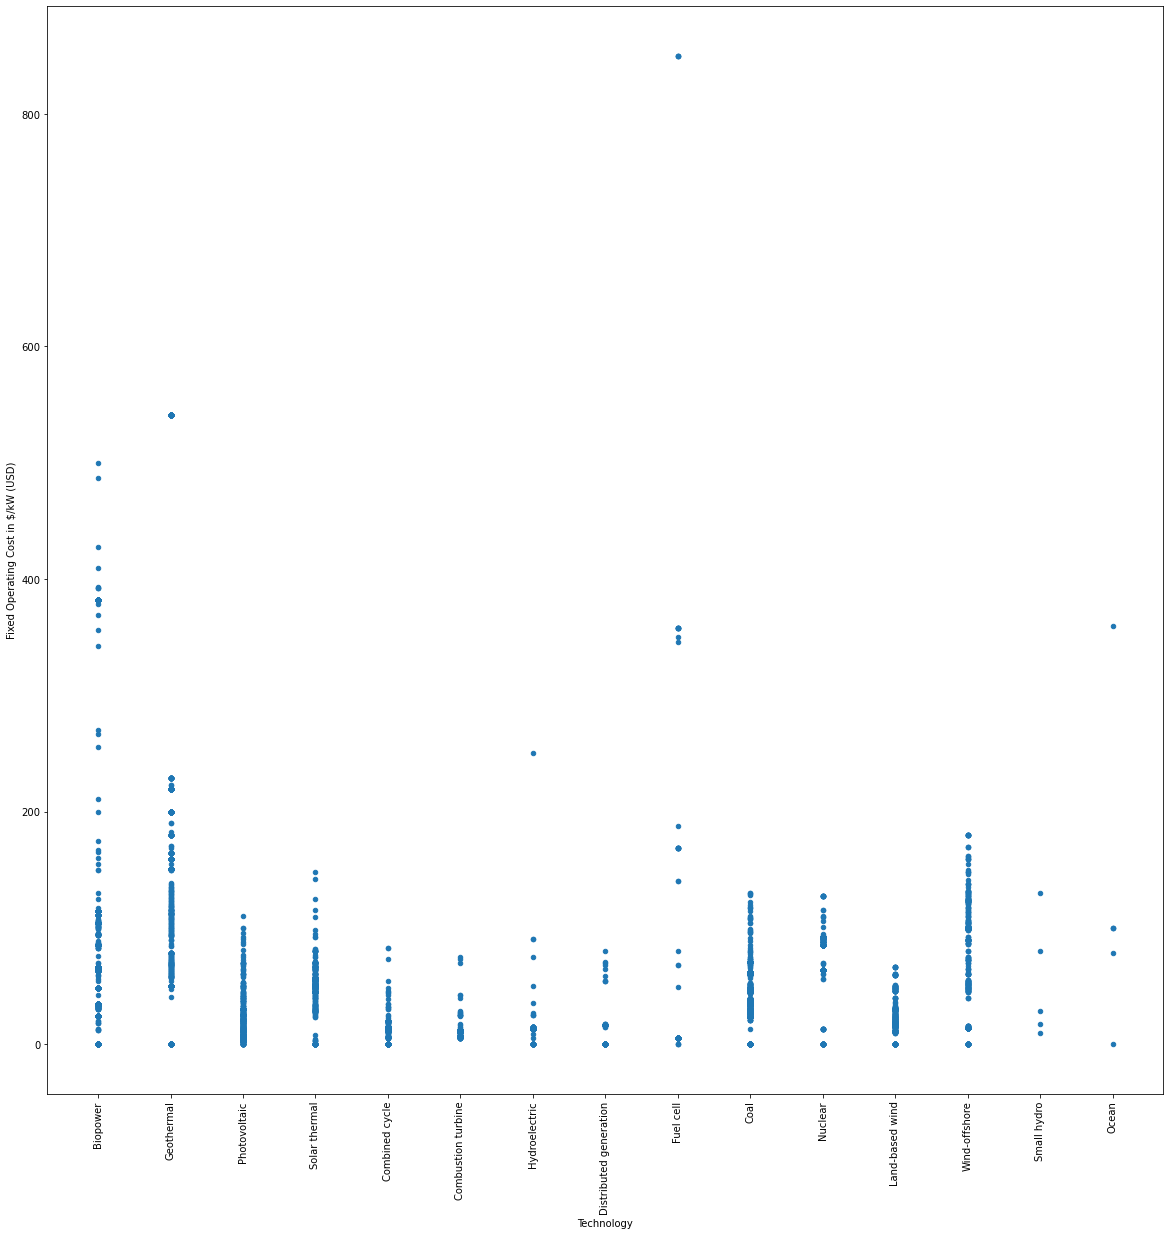

In [34]:
# Scatter Plot
#colors = {'Biopower':'green', 'Hydroelectric':'green','Geothermal':'green','Photovoltaic':'green','Solar thermal':'green', 'Land-based wind':'green','Small hydro':'green','Ocean':'green', 'Wind-offshore':'green'}
focsct = FOC.plot.scatter(x='Technology',y='FixedOMDolPerKw', figsize=(20,20))
focsct.set_xlabel("Technology")
focsct.set_ylabel("Fixed Operating Cost in $/kW" + " (" + "USD" + ")")
plt.xticks(rotation=90);

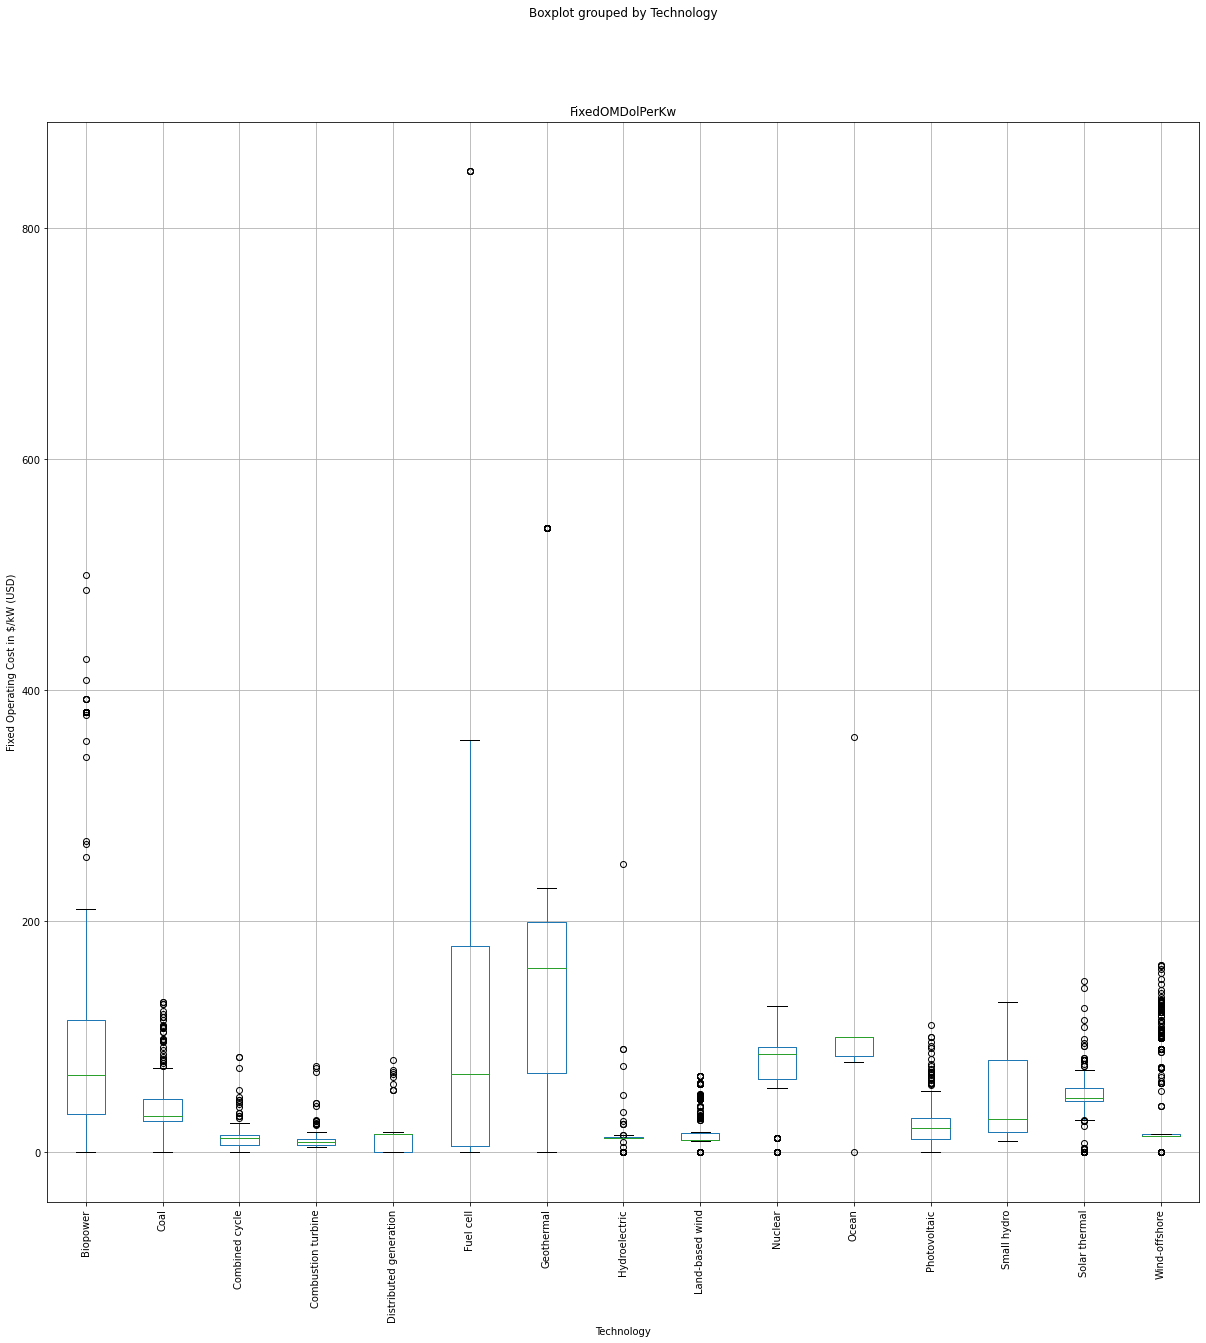

In [35]:
# Box and Whiskeer plot to see the outliers
focsct1 = OCC.boxplot(by = 'Technology' , column = ['FixedOMDolPerKw'], figsize=(20,20))
focsct1.set_xlabel("Technology")
focsct1.set_ylabel("Fixed Operating Cost in $/kW" + " (" + "USD" + ")")
plt.xticks(rotation=90);

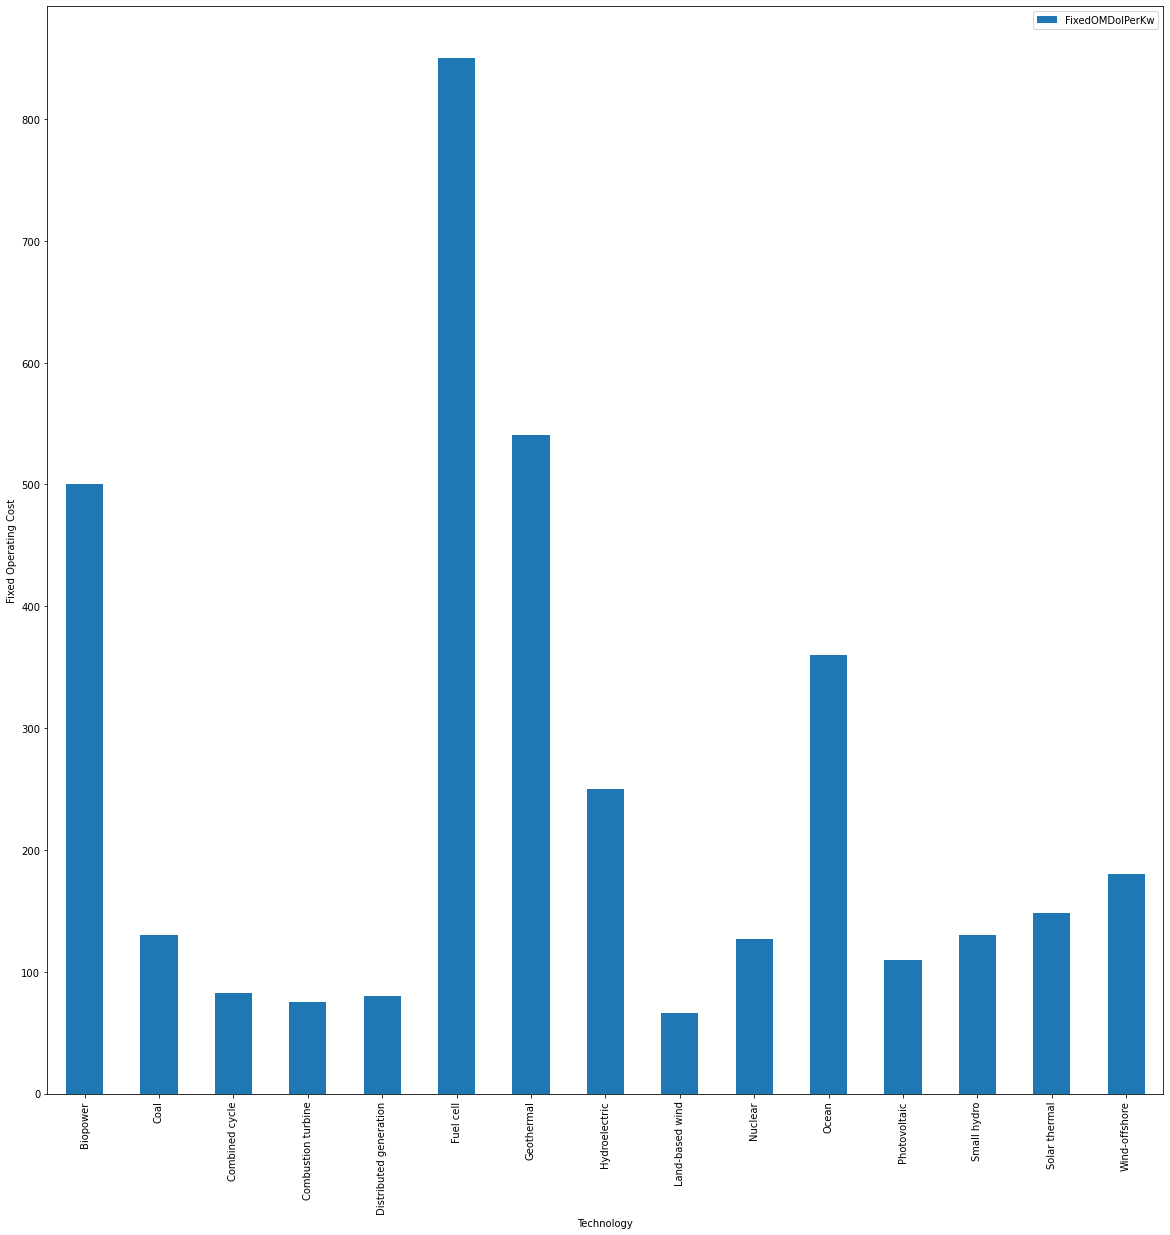

In [36]:
focbar = focmean.plot(kind = 'bar', x='Technology',y='FixedOMDolPerKw', figsize=(20,20))
focbar.set_xlabel("Technology")
focbar.set_ylabel("Fixed Operating Cost")
plt.xticks(rotation=90);

In [67]:
# Technologies LCOE
LCOE = newdata.dropna(subset = ['lcoe'])
LCOE['Technology'].unique().tolist()

['Biopower',
 'Geothermal',
 'Photovoltaic',
 'Solar thermal',
 'Combined cycle',
 'Combustion turbine',
 'Hydroelectric',
 'Distributed generation',
 'Fuel cell',
 'Coal',
 'Nuclear',
 'Land-based wind',
 'Wind-offshore',
 'Ocean',
 'Small hydro']

In [68]:
# Number of technologies with CF
len(LCOE['Technology'].unique().tolist())

15

In [70]:
# Find means of lcoe
lcoemean = LCOE.groupby('Technology',as_index=False)['lcoe'].mean()
lcoemean

,Technology,lcoe
0,Biopower,0.102895
1,Coal,0.063396
2,Combined cycle,0.040730
3,Combustion turbine,0.079600
4,Distributed generation,0.039411
5,Fuel cell,0.111021
6,Geothermal,0.070011
7,Hydroelectric,0.058231
8,Land-based wind,0.051427
9,Nuclear,0.063646


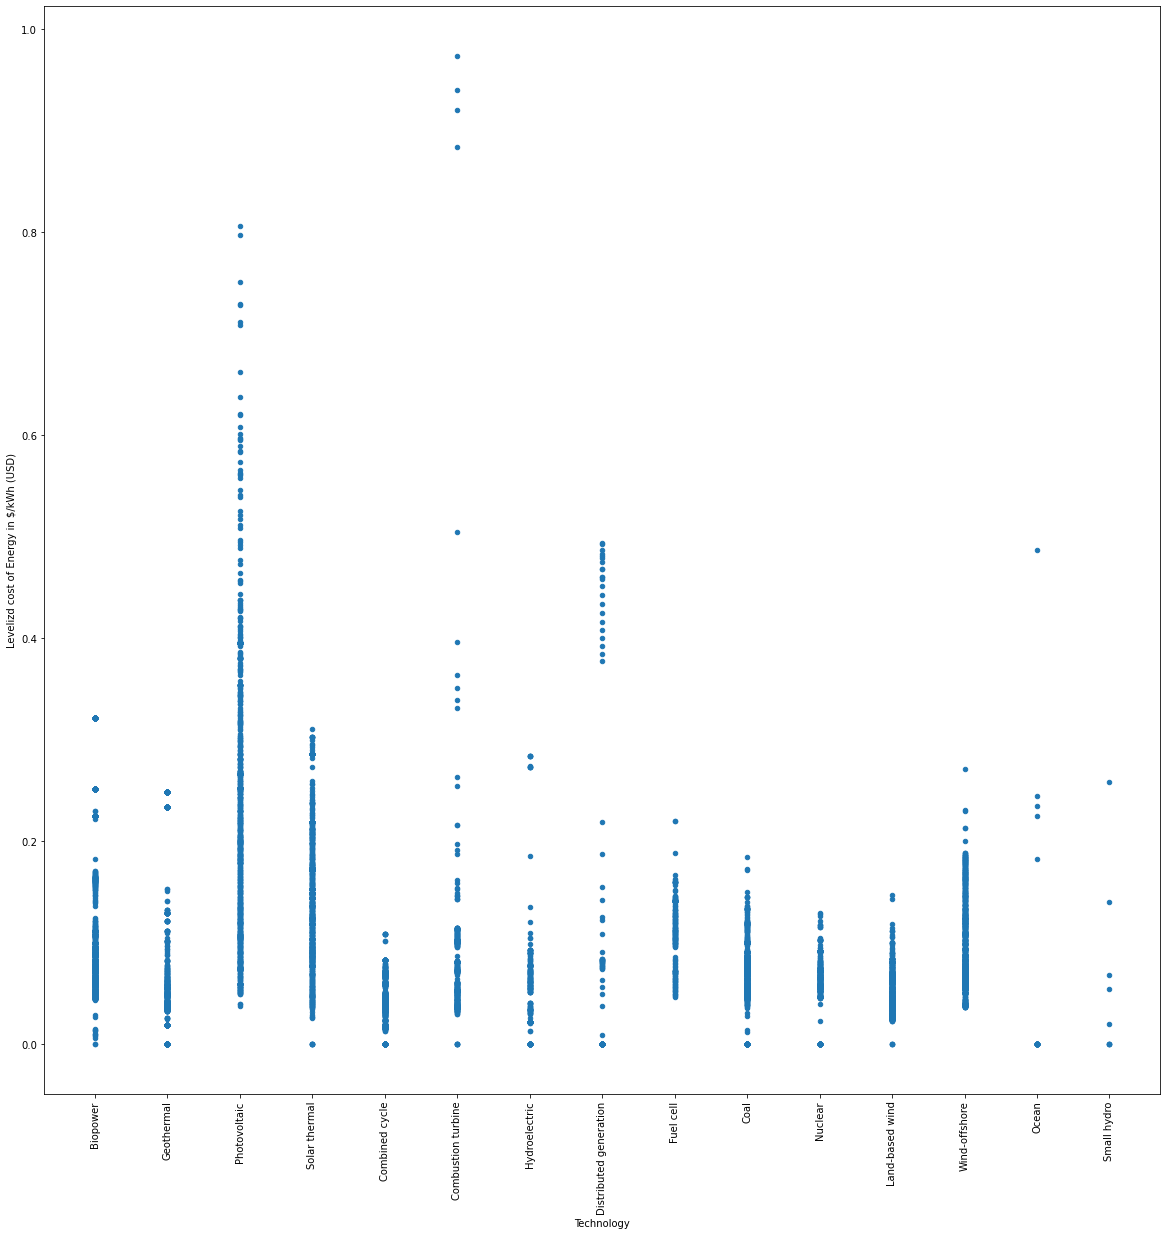

In [71]:
# Scatter Plot
#colors = {'Biopower':'green', 'Hydroelectric':'green','Geothermal':'green','Photovoltaic':'green','Solar thermal':'green', 'Land-based wind':'green','Small hydro':'green','Ocean':'green', 'Wind-offshore':'green'}
lcoesct = LCOE.plot.scatter(x='Technology',y='lcoe', figsize=(20,20))
lcoesct.set_xlabel("Technology")
lcoesct.set_ylabel("Levelizd cost of Energy in $/kWh" + " (" + "USD" + ")")
plt.xticks(rotation=90);

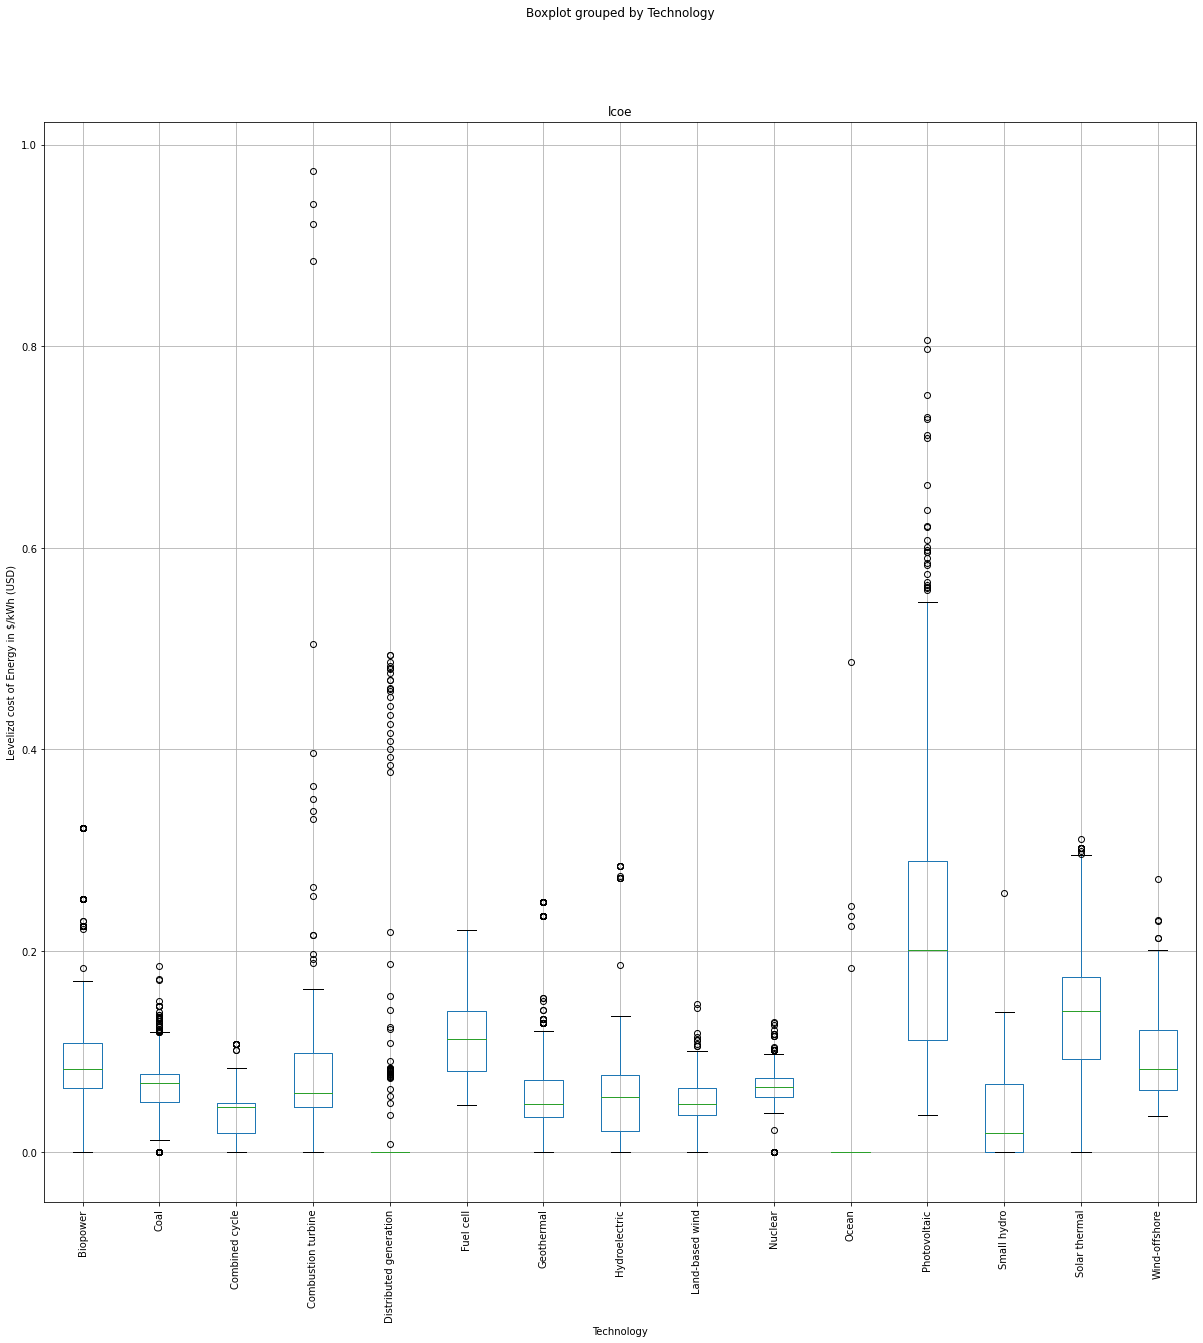

In [72]:
# Box and Whiskeer plot to see the outliers
lcoesct1 = LCOE.boxplot(by = 'Technology' , column = ['lcoe'], figsize=(20,20))
lcoesct1.set_xlabel("Technology")
lcoesct1.set_ylabel("Levelizd cost of Energy in $/kWh" + " (" + "USD" + ")")
plt.xticks(rotation=90);

In [37]:
# Technologies Capacity Factor
CF = newdata.dropna(subset = ['AvgCapacityFactor'])
CF['Technology'].unique().tolist()

['Combined cycle',
 'Combustion turbine',
 'Biopower',
 'Land-based wind',
 'Wind-offshore',
 'Geothermal',
 'Photovoltaic',
 'Solar thermal',
 'Coal',
 'Nuclear',
 'Hydroelectric',
 'Fuel cell',
 'Small hydro',
 'Ocean',
 'Distributed generation']

In [38]:
# Number of technologies with CF
len(CF['Technology'].unique().tolist())

15

In [39]:
# Find means of CF
cfmean = CF.groupby('Technology',as_index=False)['AvgCapacityFactor'].mean()
cfmean

,Technology,AvgCapacityFactor
0,Biopower,0.731789
1,Coal,0.722283
2,Combined cycle,0.661543
3,Combustion turbine,0.501531
4,Distributed generation,0.147015
5,Fuel cell,0.865455
6,Geothermal,0.821469
7,Hydroelectric,0.578795
8,Land-based wind,0.408919
9,Nuclear,0.781841


In [40]:
# Find max of CF
CF.groupby('Technology',as_index=False)['AvgCapacityFactor'].max()

,Technology,AvgCapacityFactor
0,Biopower,0.900000
1,Coal,0.930000
2,Combined cycle,0.930000
3,Combustion turbine,0.920000
4,Distributed generation,0.950000
5,Fuel cell,0.970000
6,Geothermal,0.980000
7,Hydroelectric,0.931950
8,Land-based wind,0.530000
9,Nuclear,0.902400


In [41]:
# Find min of CF
CF.groupby('Technology',as_index=False)['AvgCapacityFactor'].min()

,Technology,AvgCapacityFactor
0,Biopower,0.000
1,Coal,0.000
2,Combined cycle,0.000
3,Combustion turbine,0.000
4,Distributed generation,0.000
5,Fuel cell,0.000
6,Geothermal,0.000
7,Hydroelectric,0.000
8,Land-based wind,0.000
9,Nuclear,0.000


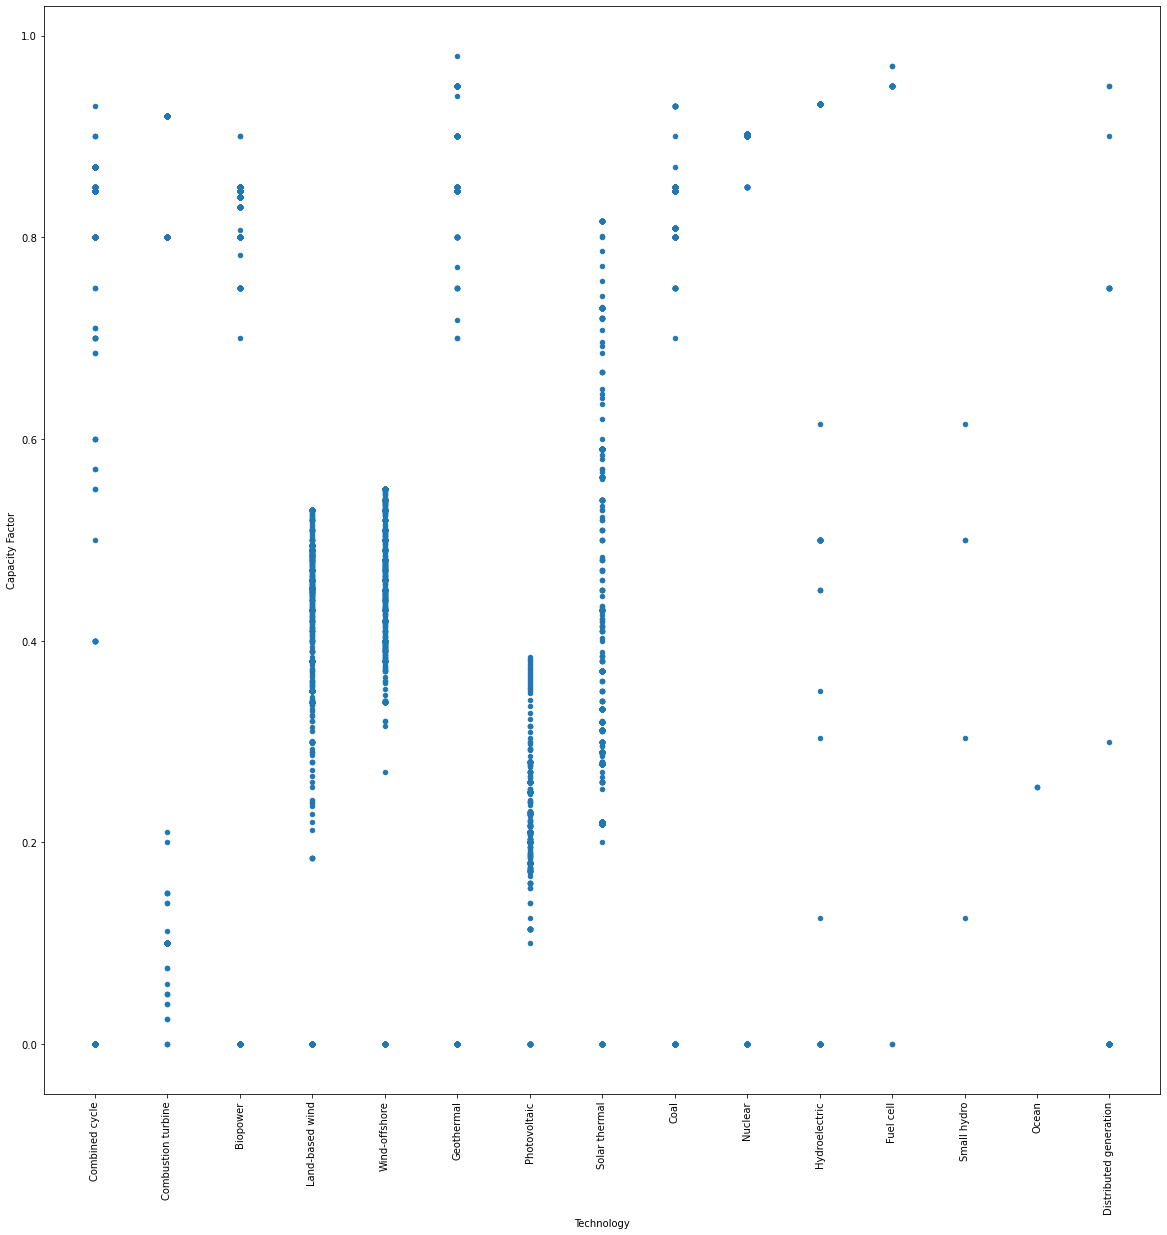

In [42]:
# Scatter Plot
#colors = {'Biopower':'green', 'Hydroelectric':'green','Geothermal':'green','Photovoltaic':'green','Solar thermal':'green', 'Land-based wind':'green','Small hydro':'green','Ocean':'green', 'Wind-offshore':'green'}
cfsct = CF.plot.scatter(x='Technology',y='AvgCapacityFactor', figsize=(20,20))
cfsct.set_xlabel("Technology")
cfsct.set_ylabel("Capacity Factor")
plt.xticks(rotation=90);

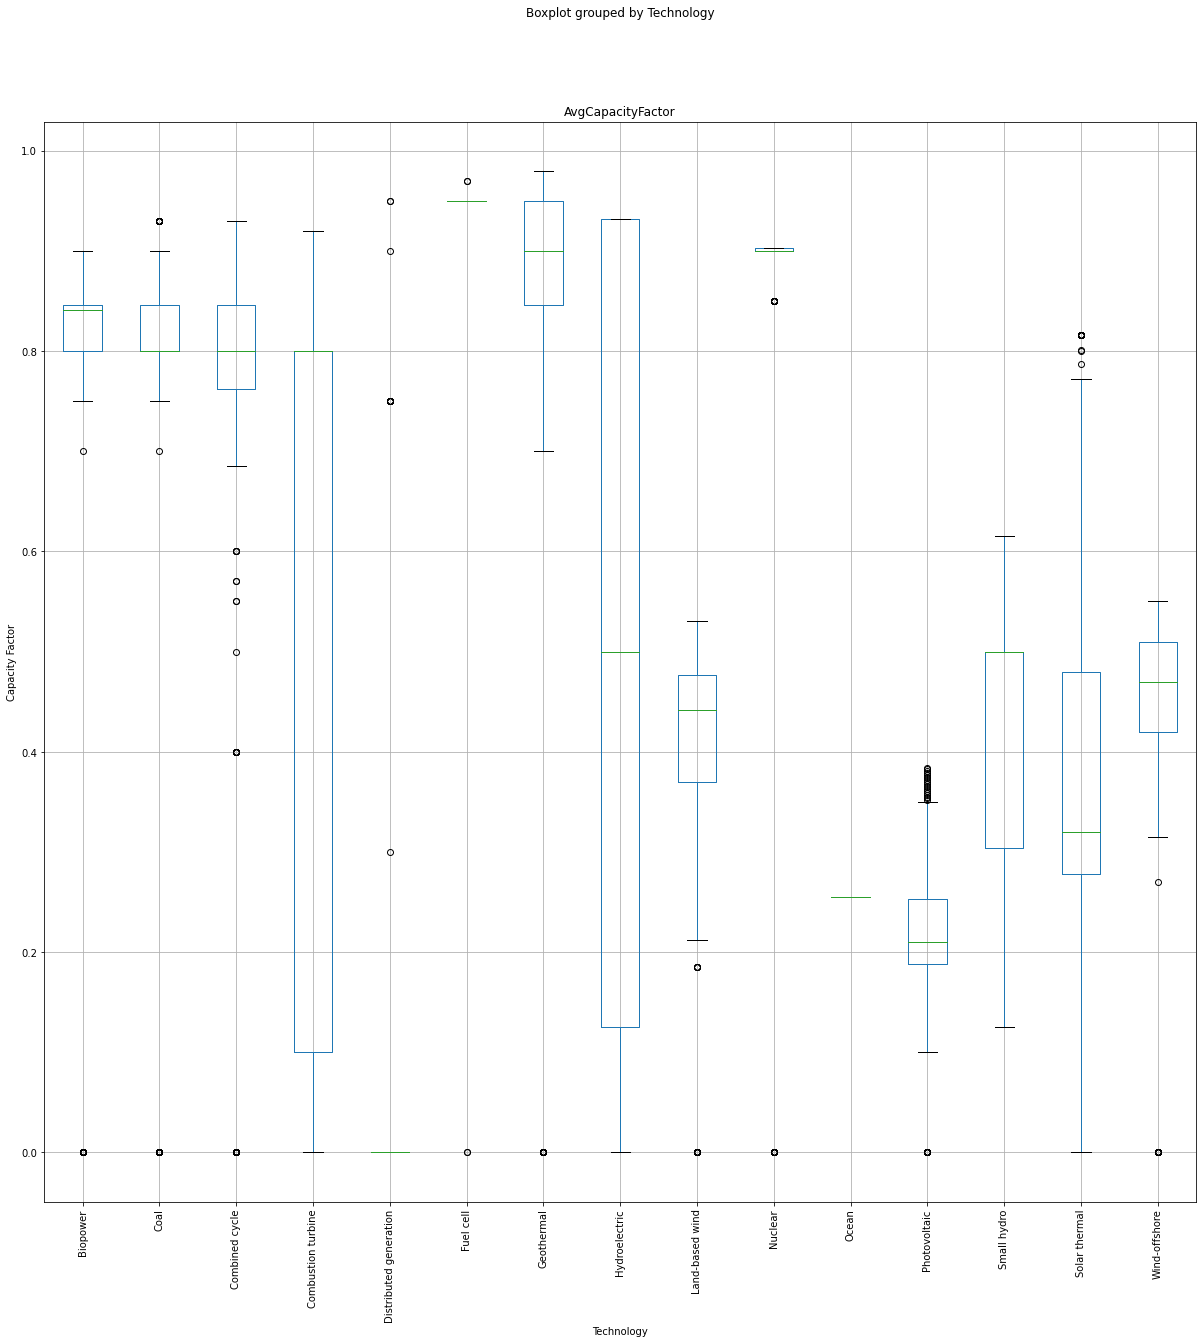

In [43]:
# Box and Whiskeer plot to see the outliers
cfsct1 = CF.boxplot(by = 'Technology' , column = ['AvgCapacityFactor'], figsize=(20,20))
cfsct1.set_xlabel("Technology")
cfsct1.set_ylabel("Capacity Factor")
plt.xticks(rotation=90);

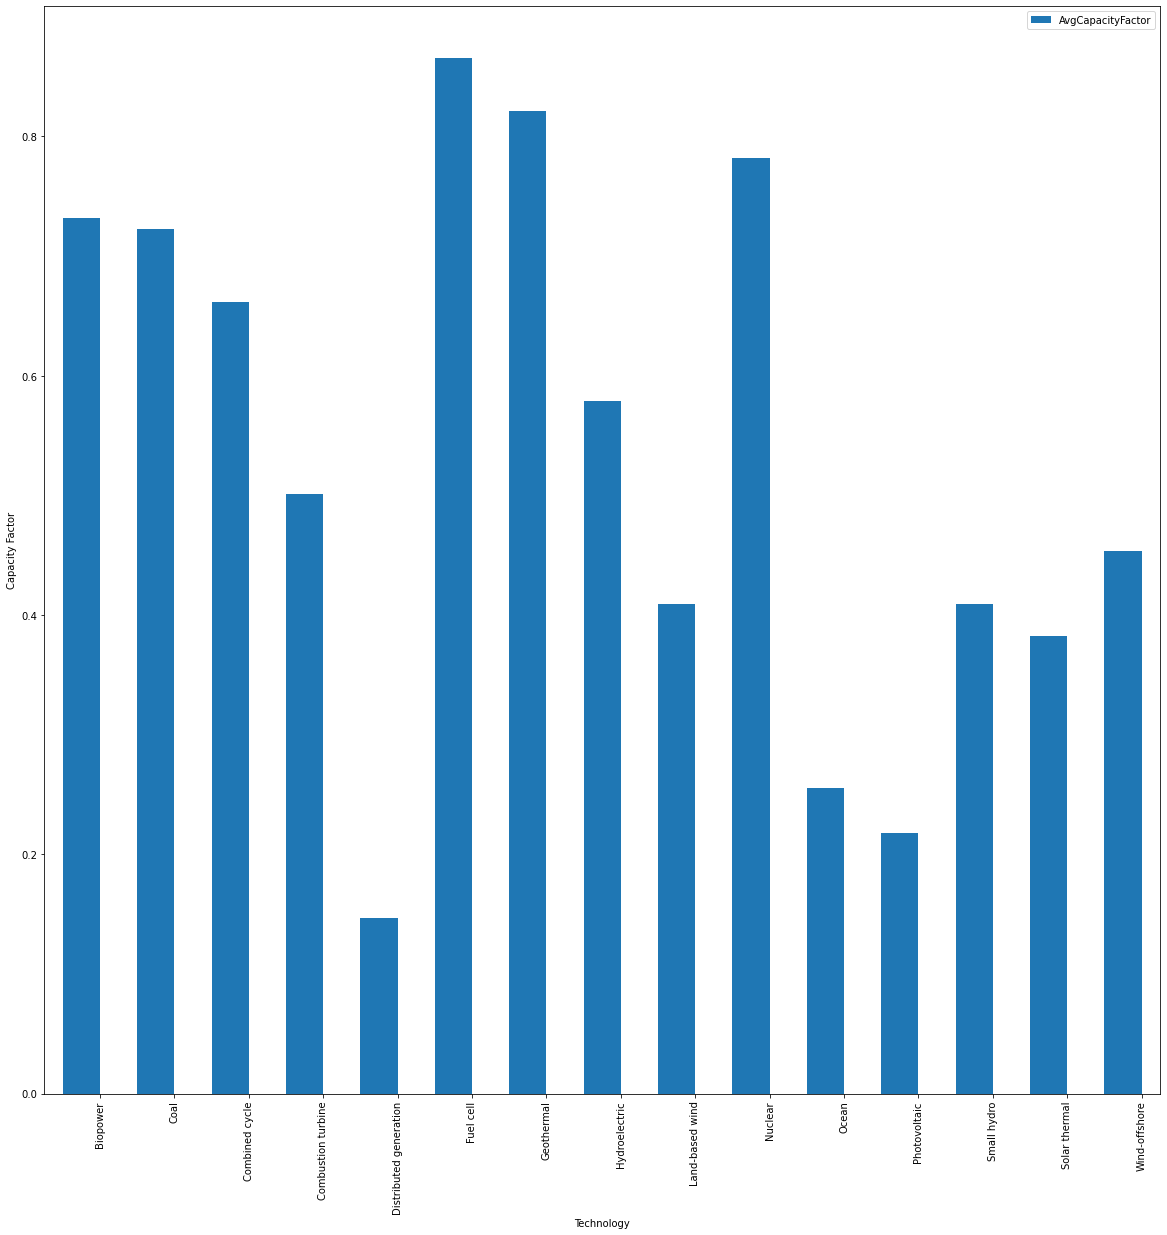

In [44]:
cfbar = cfmean.plot(kind = 'bar', x='Technology',y='AvgCapacityFactor', figsize=(20,20),position=1)
cfbar.set_xlabel("Technology")
cfbar.set_ylabel("Capacity Factor")
plt.xticks(rotation=90);

In [45]:
# Technologies with Thermal Efficiency
TE = newdata.dropna(subset = ['ThermalEfficiency'])
TE['Technology'].unique().tolist()

['Combined cycle',
 'Biopower',
 'Combustion turbine',
 'Geothermal',
 'Coal',
 'Nuclear',
 'Solar thermal',
 'Photovoltaic',
 'Hydroelectric',
 'Land-based wind',
 'Wind-offshore',
 'Distributed generation',
 'Fuel cell']

In [46]:
# Number of technologies with TE
len(TE['Technology'].unique().tolist())

13

In [47]:
# Find means of TE
temean = TE.groupby('Technology',as_index=False)['ThermalEfficiency'].mean()
temean

,Technology,ThermalEfficiency
0,Biopower,0.166909
1,Coal,0.232490
2,Combined cycle,0.275490
3,Combustion turbine,0.366395
4,Distributed generation,0.000000
5,Fuel cell,0.000000
6,Geothermal,0.062162
7,Hydroelectric,0.000000
8,Land-based wind,0.000000
9,Nuclear,0.222286


In [48]:
TE.groupby('Technology',as_index=False)['ThermalEfficiency'].max()

,Technology,ThermalEfficiency
0,Biopower,0.399250
1,Coal,0.469598
2,Combined cycle,0.639637
3,Combustion turbine,0.402044
4,Distributed generation,0.000000
5,Fuel cell,0.000000
6,Geothermal,0.100000
7,Hydroelectric,0.000000
8,Land-based wind,0.000000
9,Nuclear,0.340000


In [49]:
TE.groupby('Technology',as_index=False)['ThermalEfficiency'].min()

,Technology,ThermalEfficiency
0,Biopower,0.0
1,Coal,0.0
2,Combined cycle,0.0
3,Combustion turbine,0.0
4,Distributed generation,0.0
5,Fuel cell,0.0
6,Geothermal,0.0
7,Hydroelectric,0.0
8,Land-based wind,0.0
9,Nuclear,0.0


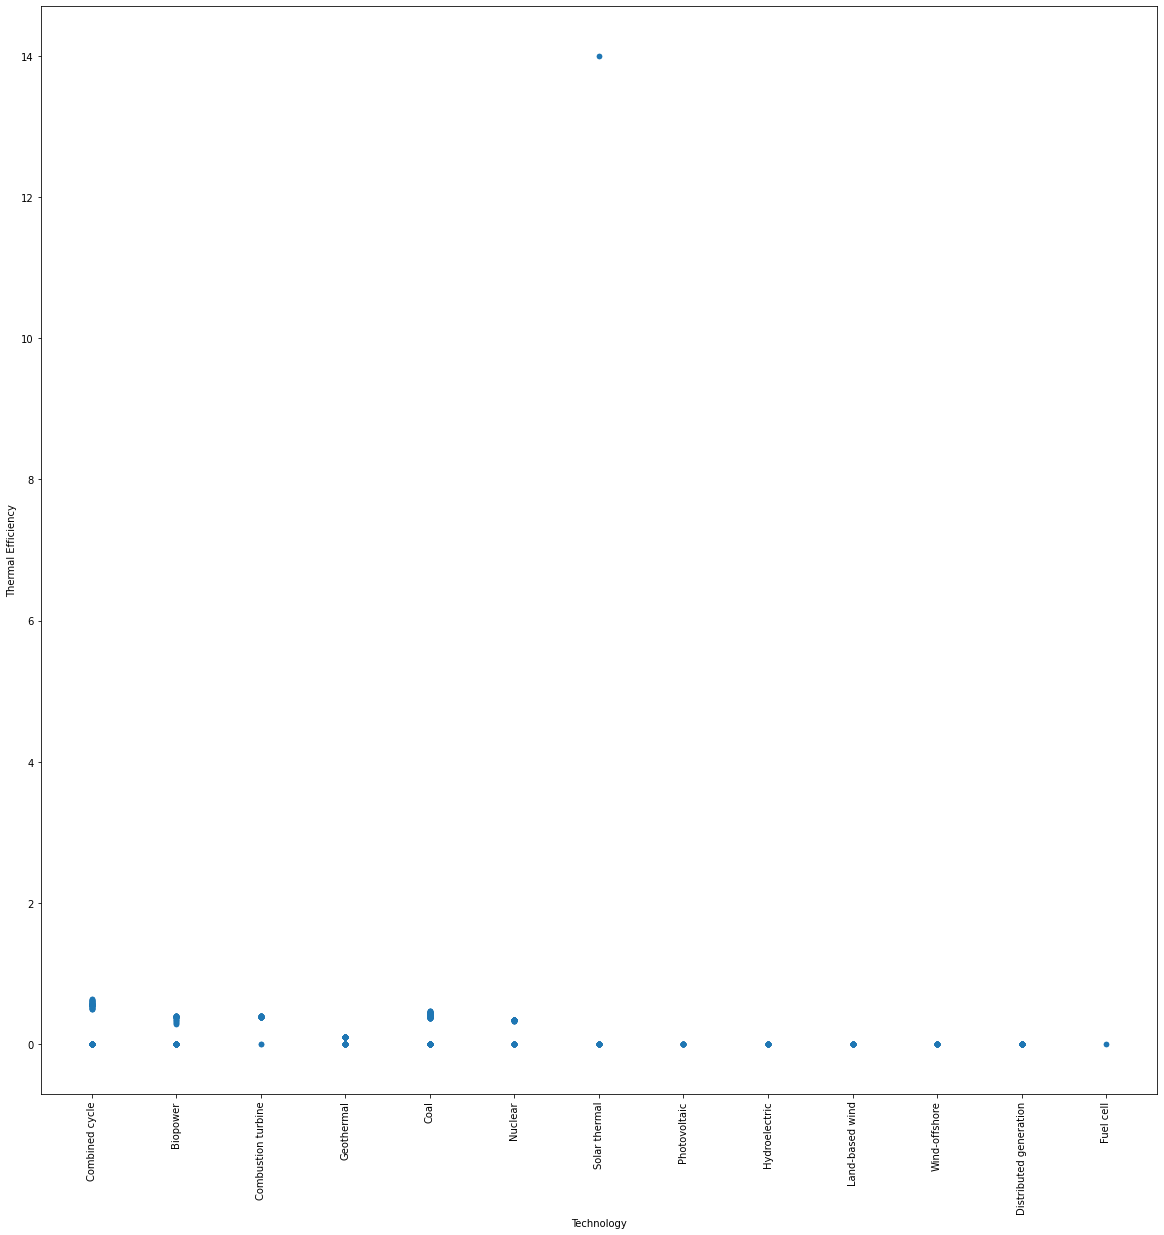

In [50]:
# Scatter Plot
#colors = {'Biopower':'green', 'Hydroelectric':'green','Geothermal':'green','Photovoltaic':'green','Solar thermal':'green', 'Land-based wind':'green','Small hydro':'green','Ocean':'green', 'Wind-offshore':'green'}
tesct = TE.plot.scatter(x='Technology',y='ThermalEfficiency', figsize=(20,20))
tesct.set_xlabel("Technology")
tesct.set_ylabel("Thermal Efficiency")
plt.xticks(rotation=90);

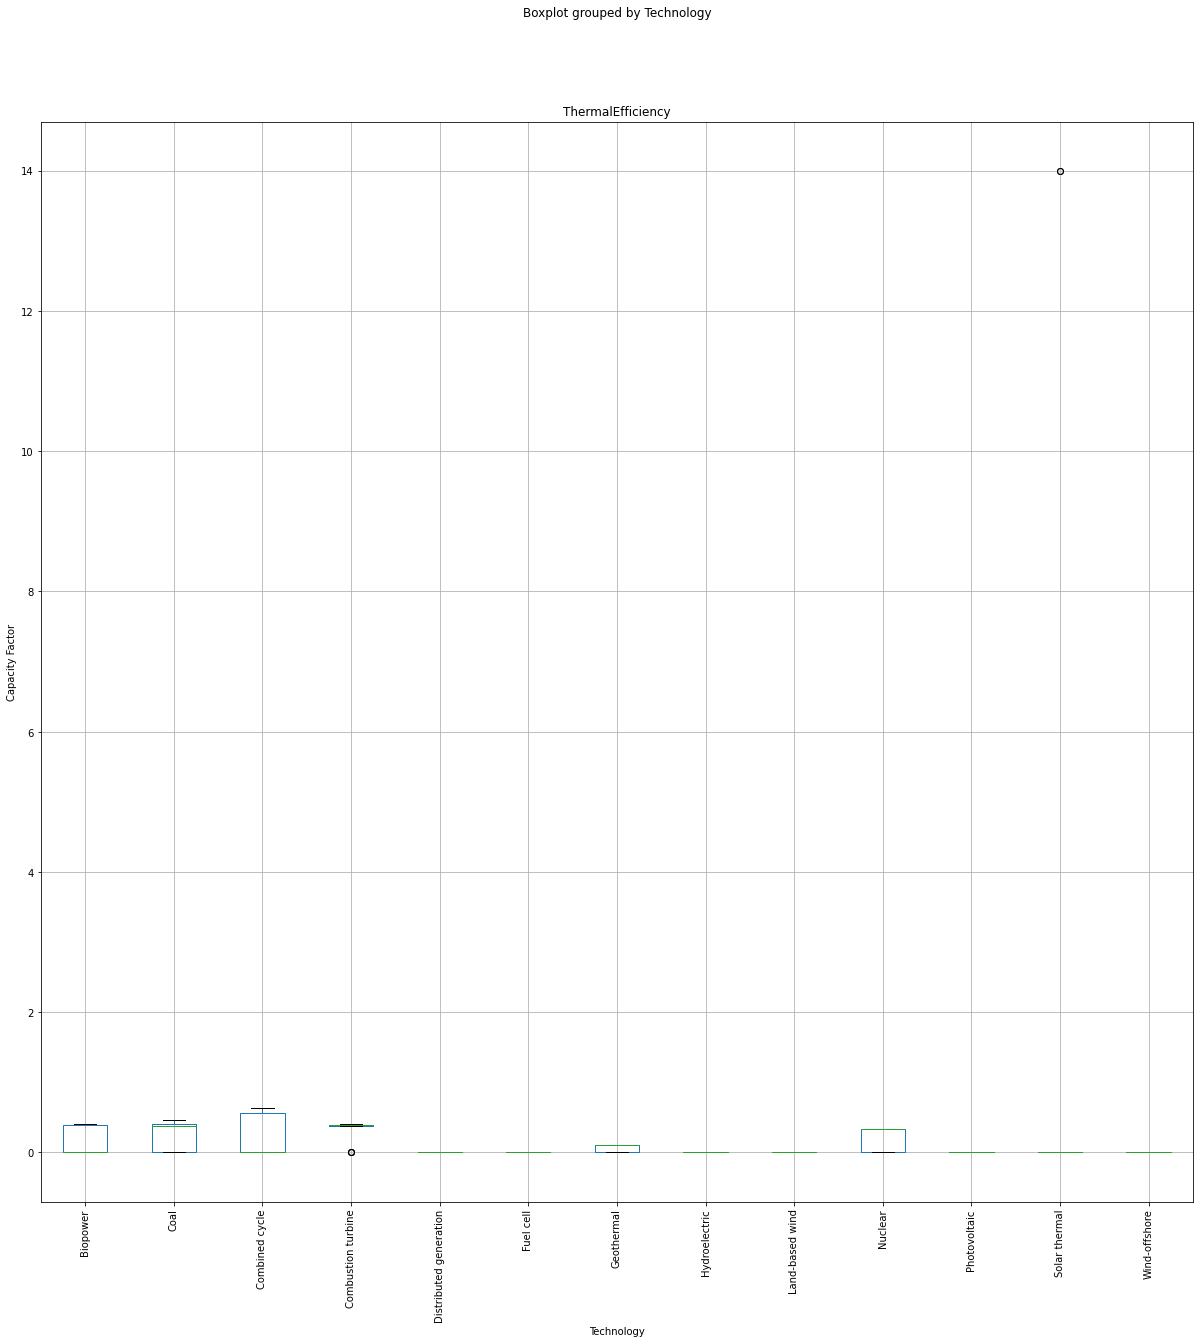

In [51]:
# Box and Whiskeer plot to see the outliers
tesct1 = TE.boxplot(by = 'Technology' , column = ['ThermalEfficiency'], figsize=(20,20))
tesct1.set_xlabel("Technology")
tesct1.set_ylabel("Capacity Factor")
plt.xticks(rotation=90);

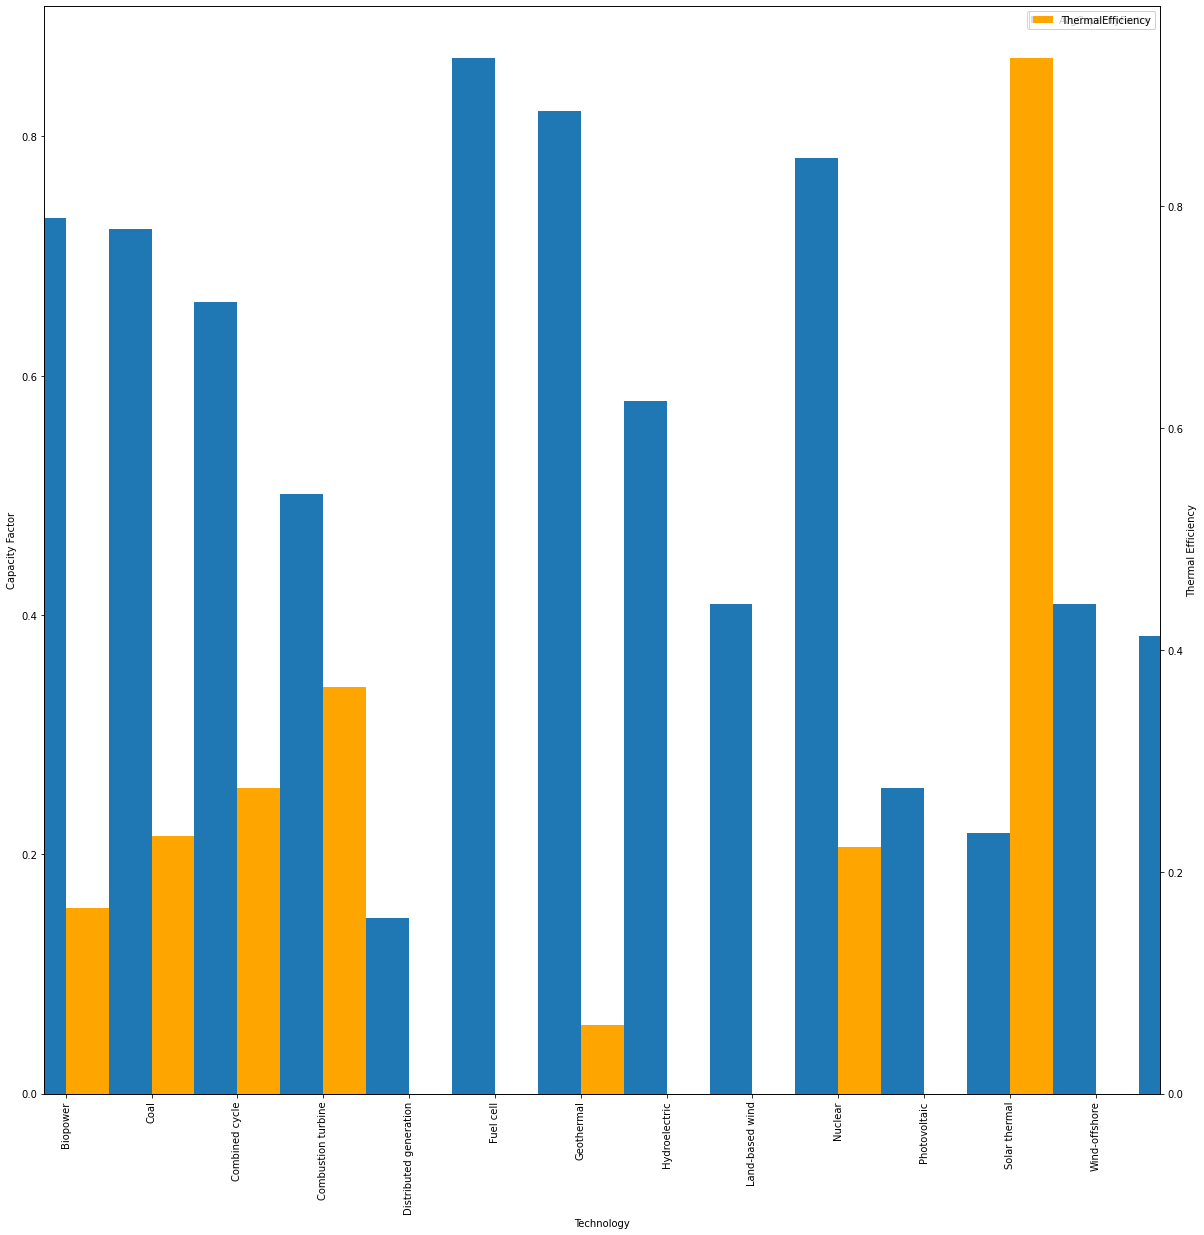

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_ylabel('Capacity Factor')
ax2.set_ylabel('Thermal Efficiency')
cfbar = cfmean.plot(kind = 'bar', x='Technology',y='AvgCapacityFactor',ax=ax1 , position=1,figsize=(20,20))
tecbar = temean.plot(kind = 'bar', x='Technology',y='ThermalEfficiency',ax=ax2 , color='orange',position=0,figsize=(20,20))
#cfbar.set_xlabel("Technology")
#cfbar.set_ylabel("Capacity Factor")
plt.xticks(rotation=90);

In [53]:
# Technologies with Lead Time
LT = newdata.dropna(subset = ['Leadtimeyears'])
LT['Technology'].unique().tolist()

['Combined cycle',
 'Combustion turbine',
 'Biopower',
 'Hydroelectric',
 'Distributed generation',
 'Fuel cell',
 'Geothermal',
 'Coal',
 'Nuclear',
 'Photovoltaic',
 'Solar thermal',
 'Land-based wind',
 'Wind-offshore',
 'Ocean']

In [54]:
# Number of technologies with LT
len(LT['Technology'].unique().tolist())

14

In [55]:
# Find means of LT
ltmean = LT.groupby('Technology',as_index=False)['Leadtimeyears'].mean()
ltmean

,Technology,Leadtimeyears
0,Biopower,2.684451
1,Coal,3.194678
2,Combined cycle,1.944472
3,Combustion turbine,1.884060
4,Distributed generation,1.254902
5,Fuel cell,2.544776
6,Geothermal,3.196532
7,Hydroelectric,2.169811
8,Land-based wind,1.626812
9,Nuclear,4.872951


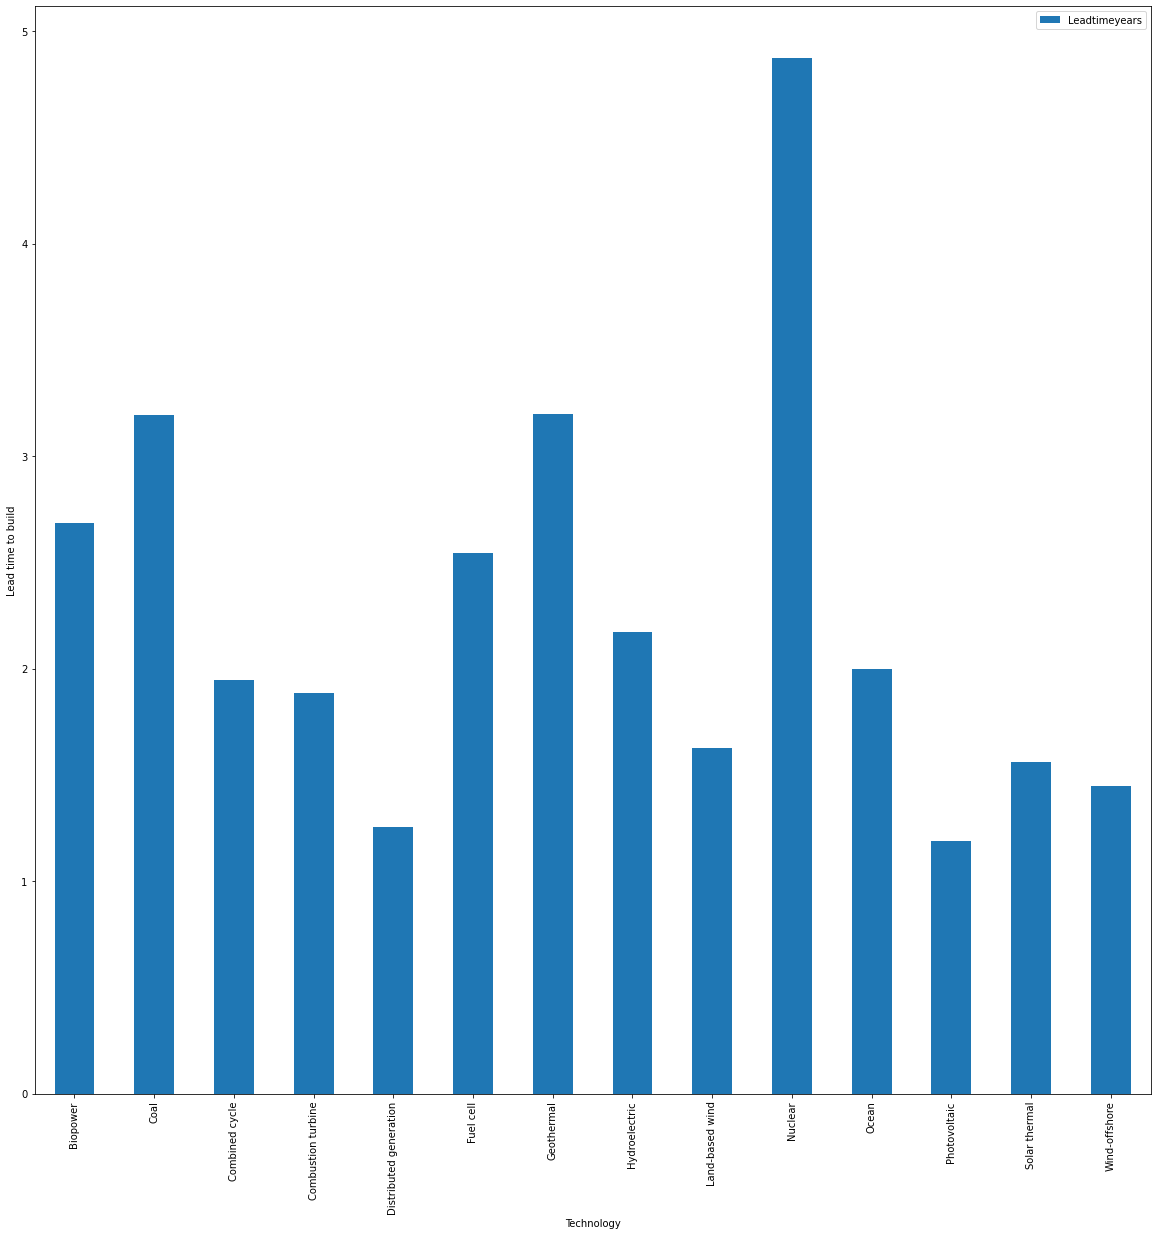

In [56]:
ltbar = ltmean.plot(kind = 'bar', x='Technology',y='Leadtimeyears', figsize=(20,20))
ltbar.set_xlabel("Technology")
ltbar.set_ylabel("Lead time to build")
plt.xticks(rotation=90);

In [57]:
# Technologies with Asset life
AL = newdata.dropna(subset = ['LifetimeYears'])
AL['Technology'].unique().tolist()

['Combined cycle',
 'Combustion turbine',
 'Biopower',
 'Photovoltaic',
 'Solar thermal',
 'Land-based wind',
 'Wind-offshore',
 'Geothermal',
 'Coal',
 'Nuclear',
 'Hydroelectric',
 'Small hydro',
 'Fuel cell',
 'Ocean',
 'Distributed generation']

In [58]:
# Number of technologies with LT
len(AL['Technology'].unique().tolist())

15

In [59]:
# Find means of AL
almean = AL.groupby('Technology',as_index=False)['LifetimeYears'].mean()
almean

,Technology,LifetimeYears
0,Biopower,35.582751
1,Coal,40.636503
2,Combined cycle,26.484185
3,Combustion turbine,32.455090
4,Distributed generation,2.857143
5,Fuel cell,18.285714
6,Geothermal,20.534884
7,Hydroelectric,63.409091
8,Land-based wind,20.831874
9,Nuclear,34.806630


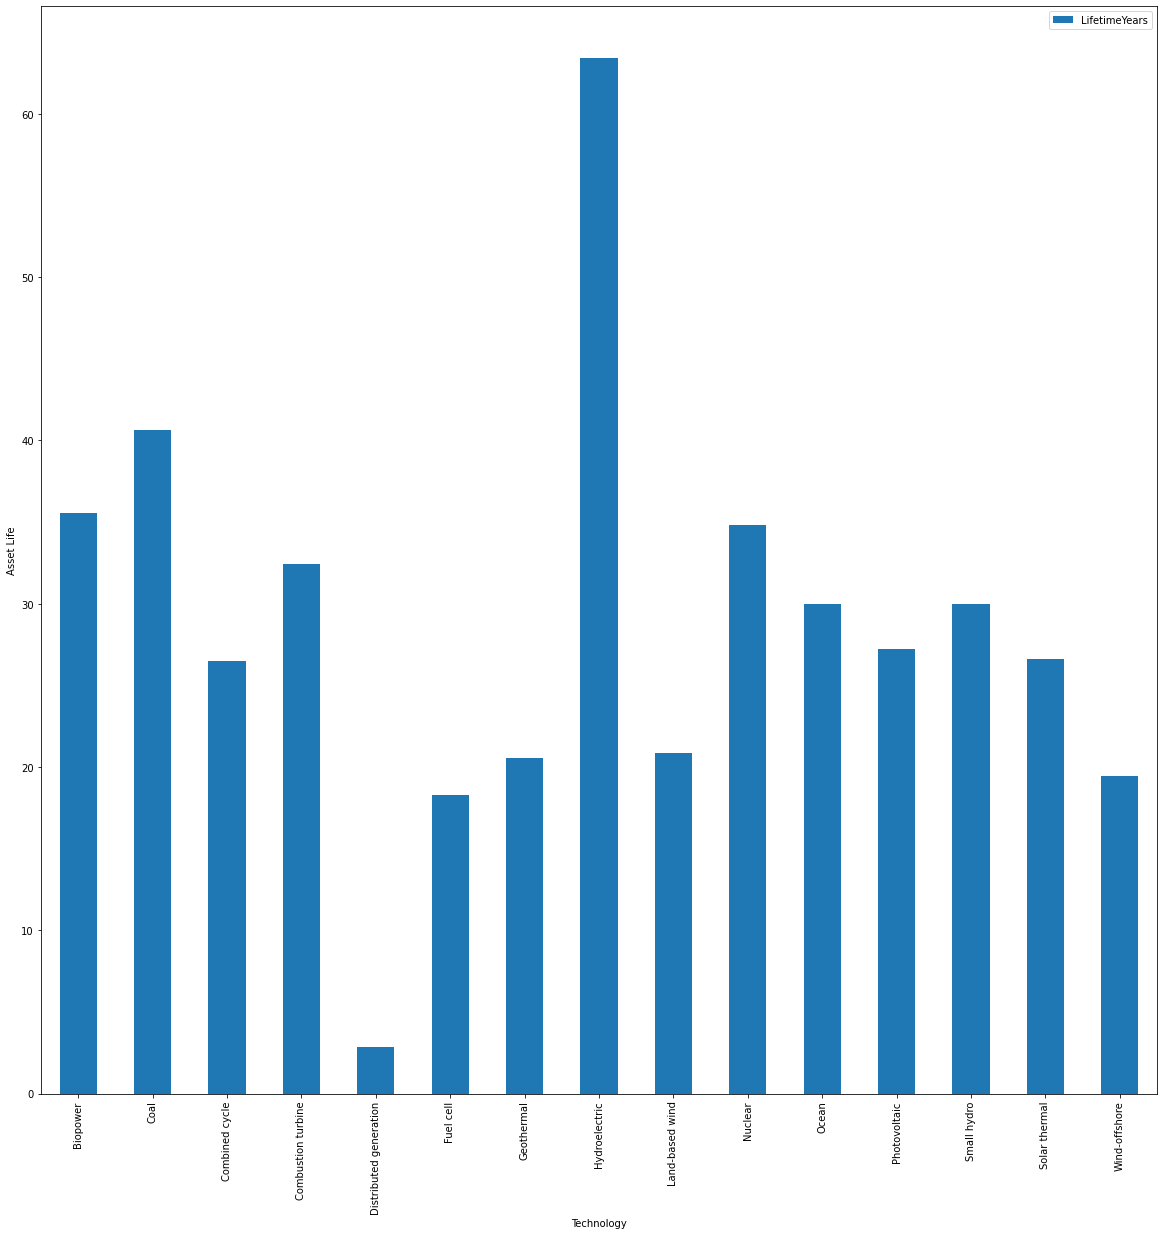

In [60]:
albar = almean.plot(kind = 'bar', x='Technology',y='LifetimeYears', figsize=(20,20))
albar.set_xlabel("Technology")
albar.set_ylabel("Asset Life")
plt.xticks(rotation=90);

In [61]:
# Technologies with CO2 Emissions
CE = newdata.dropna(subset = ['Co2MetricTonsPerMwh'])
CE['Technology'].unique().tolist()

['Combustion turbine',
 'Combined cycle',
 'Biopower',
 'Distributed generation',
 'Fuel cell',
 'Coal',
 'Solar thermal',
 'Photovoltaic',
 'Hydroelectric',
 'Land-based wind',
 'Wind-offshore',
 'Geothermal',
 'Nuclear']

In [62]:
# Number of technologies with LT
len(CE['Technology'].unique().tolist())

13

In [63]:
# Find means of AL
cemean = CE.groupby('Technology',as_index=False)['Co2MetricTonsPerMwh'].mean()
cemean

,Technology,Co2MetricTonsPerMwh
0,Biopower,1738.682432
1,Coal,1395.813008
2,Combined cycle,442.573379
3,Combustion turbine,1078.073171
4,Distributed generation,496.826531
5,Fuel cell,1581.375000
6,Geothermal,0.000000
7,Hydroelectric,0.000000
8,Land-based wind,0.000000
9,Nuclear,0.000000


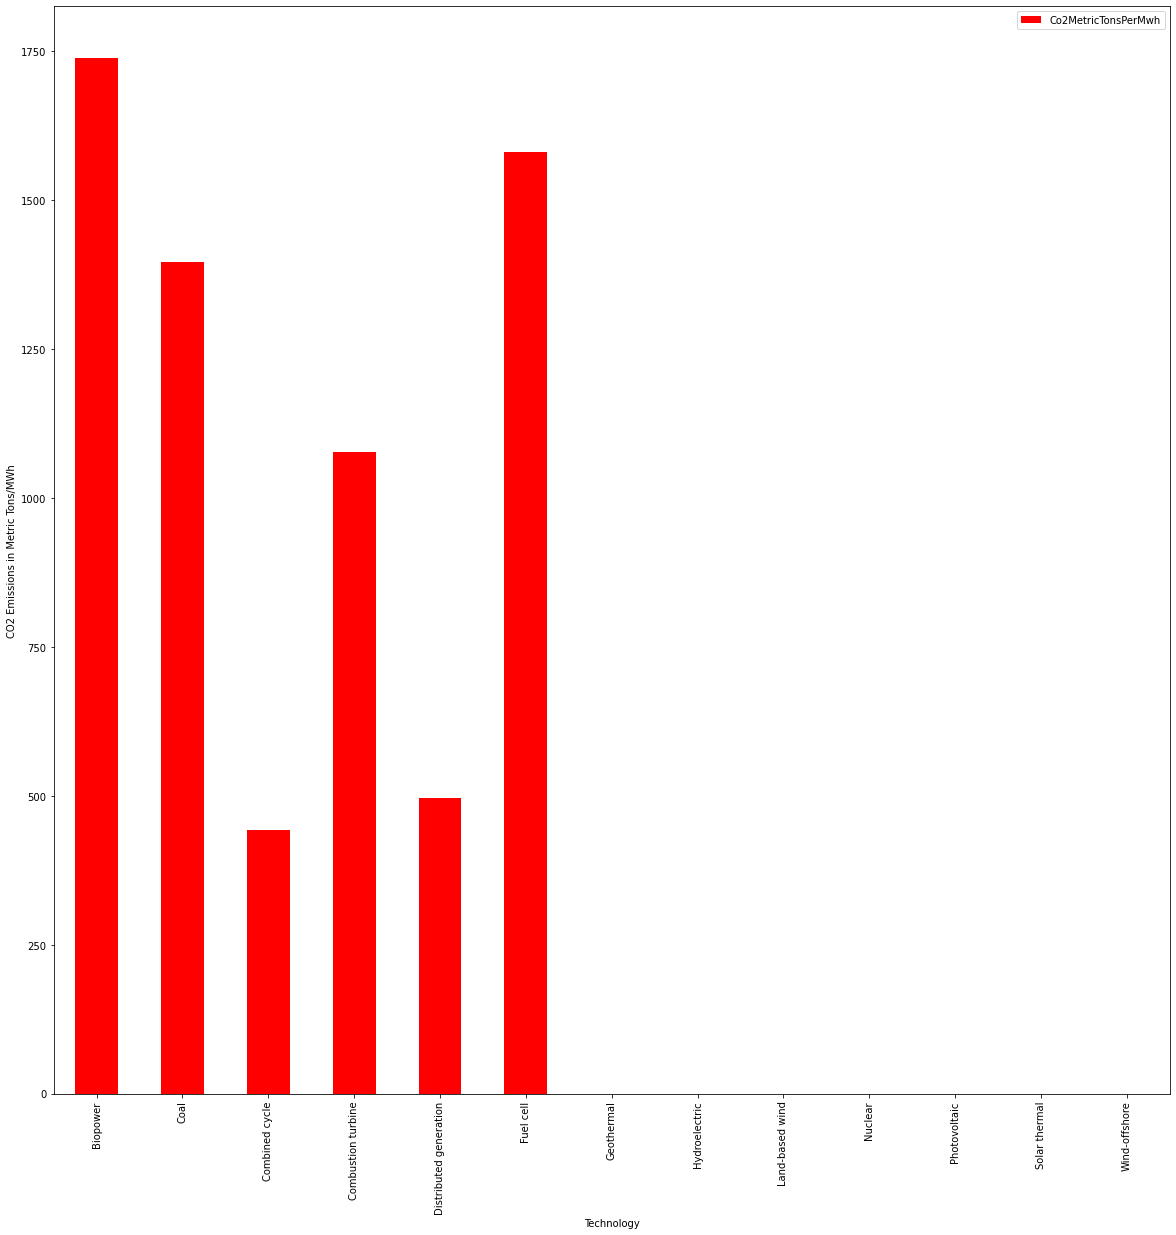

In [65]:
cebar = cemean.plot(kind = 'bar', x='Technology',y='Co2MetricTonsPerMwh', figsize=(20,20) , color = 'red')
cebar.set_xlabel("Technology")
cebar.set_ylabel("CO2 Emissions in Metric Tons/MWh")
plt.xticks(rotation=90);